In [3]:
%matplotlib inline
import pyccl as ccl
import numpy as np
import pylab as plt
import glass.observations
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.lines import Line2D
import os

In [4]:
# Define the measured mass defferences between the neutrino species; These are accurately constrained
dm21 = np.sqrt(7.49e-5) # as measured from atmospheric neutrinos
dm31 = np.sqrt(2.484e-3) # as measured from solar neutrinos

In [4]:

# Check the masses of neutrinos for: the mass of neutrino masses be 0.18 eV, distributed according to the normal hierarchy: 0.18 eV corresponding to 3x the lower bound of 0.06 eV?
ccl.neutrinos._get_neutrino_masses(m_nu = 0.18, mass_split = 'normal')

array([0.05302979, 0.05374345, 0.07322676])

In [5]:
# Get the sum of neutrinomasses if all mass is defined by the known mass differences:
ccl.neutrinos.nu_masses(m_nu=dm21+ dm31, mass_split='sum')

np.float64(0.05849422178687597)

In [5]:
# Create new Cosmology object with a given set of parameters. This keeps track
# of previously-computed cosmological functions

# keeping omega_m and omega_b fixed
# cosmo = ccl.Cosmology(
#     Omega_c=0.27, Omega_b=0.045, h=0.67, sigma8=0.8, n_s=0.96,
#     transfer_function='boltzmann_camb', m_nu=0.0, mass_split='equal')

# cosmo_deg = ccl.Cosmology(
#     Omega_c=0.27-0.00430, Omega_b=0.045, h=0.67, sigma8=0.8, n_s=0.96,
#     transfer_function='boltzmann_camb', m_nu=0.18, mass_split='equal')

# cosmo_neutrino = ccl.Cosmology(
#     Omega_c=0.27-0.00430, Omega_b=0.045, h=0.67, sigma8=0.8, n_s=0.96,
#     m_nu=[[0.05302979, 0.05374345, 0.07322676]], 
#     transfer_function='boltzmann_camb')

# cosmo_neutrino_m0_massless = ccl.Cosmology(
#     Omega_c=0.27-0.001399, Omega_b=0.045, h=0.67, sigma8=0.8, n_s=0.96,
#     m_nu=[0.000, dm21, dm31], 
#     transfer_function='boltzmann_camb')

# Defining the same as above but for sigma8 <---> A_s:
cosmo = ccl.Cosmology(
    Omega_c=0.27, Omega_b=0.045, h=0.67, A_s=2.1e-9, n_s=0.96,
    transfer_function='boltzmann_camb', m_nu=0.0, mass_split='equal')

cosmo_deg = ccl.Cosmology(
    Omega_c=0.27-0.00430, Omega_b=0.045, h=0.67, A_s=2.1e-9, n_s=0.96,
    transfer_function='boltzmann_camb', m_nu=0.18, mass_split='equal')

cosmo_neutrino = ccl.Cosmology(
    Omega_c=0.27-0.00430, Omega_b=0.045, h=0.67, A_s=2.1e-9, n_s=0.96,
    m_nu=[[0.05302979, 0.05374345, 0.07322676]], 
    transfer_function='boltzmann_camb')

cosmo_neutrino_m0_massless = ccl.Cosmology(
    Omega_c=0.27-0.001399, Omega_b=0.045, h=0.67, A_s=2.1e-9, n_s=0.96,
    m_nu=[0.000, dm21, dm31], 
    transfer_function='boltzmann_camb')

# Redshift-dependent functions
z = np.linspace(0,3.0,3024)

# Bias for LCDM with no massive neutrinos
bz = 0.95/ccl.growth_factor(cosmo,1./(1+z))

# Bias for the cosmology with 3 massive neutrinos in normal hierarchy:
bz_nu = 0.95/ccl.growth_factor(cosmo_neutrino,1./(1+z))

# Bias for cosmology where the lightest neutrino is masseless;
bz_nu_m0_massless = 0.95/ccl.growth_factor(cosmo_neutrino_m0_massless,1./(1+z))

In [7]:
# Look at how the different neutrino parameters impact the dimensionless densities of matter, dark energy, massice neutrinos and curvature:
print("matter:\n    ", 
      ccl.omega_x(cosmo, 1., "matter"), "\n    ", 
      ccl.omega_x(cosmo_neutrino, 1., "matter"), "\n    ",  
      ccl.omega_x(cosmo_neutrino_m0_massless, 1., "matter"), "\n    ",  
      ccl.omega_x(cosmo_deg, 1., "matter"))

print("dark energy:\n    ",
      ccl.omega_x(cosmo, 1., "dark_energy"), "\n    ", 
      ccl.omega_x(cosmo_neutrino, 1., "dark_energy"), "\n    ", 
      ccl.omega_x(cosmo_neutrino_m0_massless, 1., "dark_energy"))

print("Masive Neutrinos:\n    ",
      ccl.omega_x(cosmo, 1., "neutrinos_massive"), "\n    ", 
      ccl.omega_x(cosmo_neutrino, 1., "neutrinos_massive"), "\n    ", 
      ccl.omega_x(cosmo_neutrino_m0_massless, 1., "neutrinos_massive"), "\n    ", 
      ccl.omega_x(cosmo_deg, 1., "neutrinos_massive"))

print("curvature:\n    ",
      ccl.omega_x(cosmo, 1., "curvature"), "\n    ", 
      ccl.omega_x(cosmo_neutrino, 1., "curvature"), "\n    ", 
      ccl.omega_x(cosmo_neutrino_m0_massless, 1., "curvature"))

matter:
     0.315 
     0.31500520094473083 
     0.31500057149298316 
     0.31500519580343944
dark energy:
     0.6849068260310955 
     0.6849396543958353 
     0.6849316074110929
Masive Neutrinos:
     0.0 
     0.0043052009447308755 
     0.0013995714929830173 
     0.004305195803439476
curvature:
     0.0 
     0.0 
     0.0


In [8]:
# The cosmological parameters for 3 massive neutrinos:
cosmo_neutrino

<pyccl.cosmology.Cosmology>
	A_s     = 2.1e-09
	Neff    = 3.044
	Omega_b = 0.045
	Omega_c = 0.2657
	h       = 0.67
	m_nu    = ((0.05302979, 0.05374345, 0.07322676),)
	n_s     = 0.96
	extra_parameters =
	HASH_ACCURACY_PARAMS = 0x668d3f2f22d2d7dd

In [6]:
# Compare the density fractions os massive neutrinos and marrer at z=0:
print(ccl.background.omega_x(cosmo_neutrino, species='neutrinos_massive', a=1),
      ccl.background.omega_x(cosmo_neutrino, species='matter', a=1))
print(ccl.background.omega_x(cosmo_neutrino_m0_massless, species='neutrinos_massive', a=1),
      ccl.background.omega_x(cosmo_neutrino_m0_massless, species='matter', a=1))

0.0043052009447308755 0.31500520094473083
0.0013995714929830173 0.31500057149298316


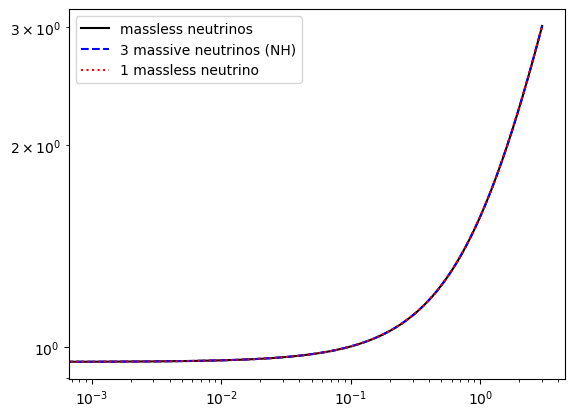

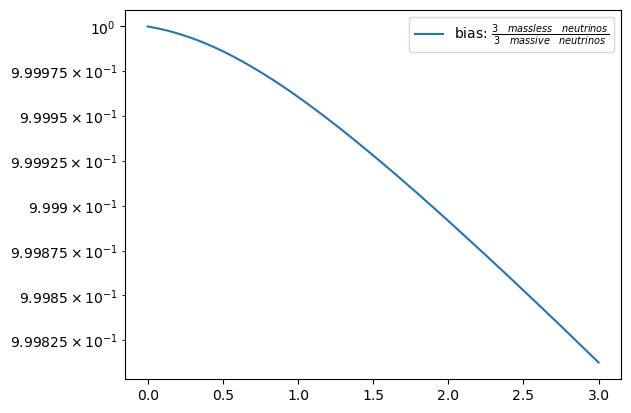

In [10]:
# Compare the bias in the 3 cases of the normal cosmology, the massive and massless neutrinos 
plt.loglog()
plt.plot(z, bz, color='k', label='massless neutrinos')
plt.plot(z, bz_nu, linestyle='dashed', color='b', label='3 massive neutrinos (NH)')
plt.plot(z, bz_nu_m0_massless, linestyle='dotted', color='r', label='1 massless neutrino')
plt.legend()
plt.figure()
plt.yscale('log')
plt.plot(z, bz/bz_nu, label=r'bias: $\frac{3\quad massless\quad neutrinos}{3\quad massive\quad neutrinos}$')
plt.legend()

In [7]:
# Set up the observational variables and parameters:

# galaxy density (using 1/100 of the expected galaxy number density for Stage-IV)
n_arcmin2 = 0.3

# true redshift distribution following a Smail distribution: https://arxiv.org/pdf/astro-ph/9402048
dndz = glass.observations.smail_nz(z, z_mode=0.9, alpha=2., beta=1.5)
dndz *= n_arcmin2

# compute tomographic redshift bin edges with equal density
nbins = 6
zbins = glass.observations.equal_dens_zbins(z, dndz, nbins=nbins)

# photometric redshift error
sigma_z0 = 0.03

# split dndz using the same Gaussian error model assumed in the sampling
tomo_nz = glass.observations.tomo_nz_gausserr(z, dndz, sigma_z0, zbins)


In [8]:
# a heaviside function from 0.9 to 1.8 convolved with the true redshift distribution
spec_z = (np.heaviside(z-0.9, 1) - np.heaviside(z-1.8, 1))*dndz

# NOTE: the heaviside function is used to definte the redshift window of the survey/data, this window is then binned for specific redshifts

In [9]:
zbins_spec = glass.observations.fixed_zbins(zmin=0.9, zmax=1.8, dz=0.05)
# split dndz using the same Gaussian error model assumed in the sampling
tomo_nz_spec = glass.observations.tomo_nz_gausserr(z, spec_z, 0.0003, zbins_spec)

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_2136/873842697.py:1: SyntaxWarning: invalid escape sequence '\D'
  plt.title('Euclid Spectroscopic Sample in Tomographic Bins of $\Delta z = 0.05$')


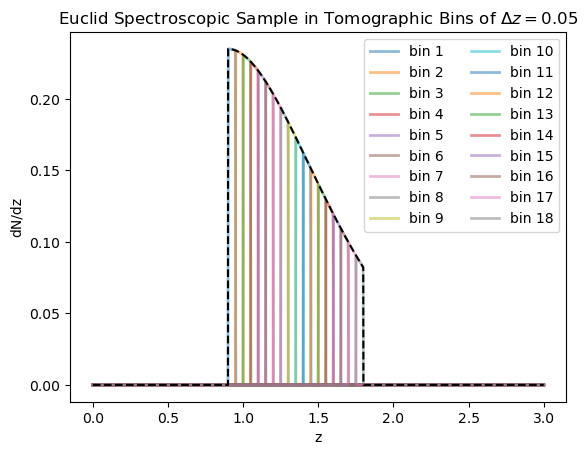

In [14]:
plt.title('Euclid Spectroscopic Sample in Tomographic Bins of $\Delta z = 0.05$')
for i in range(len(tomo_nz_spec)):
    plt.plot(z, tomo_nz_spec[i], alpha=0.5, label=f'bin {i+1}', lw=2)
plt.plot(z, spec_z, ls='--', c='k')
plt.legend(loc=0, ncol=2)
plt.ylabel('dN/dz')
plt.xlabel('z')
#plt.savefig('euclid_spec_tomo_bins.png', dpi=300)
plt.show()


# plt.figure(figsize=(10, 5))
# plt.plot(z, spec_z)
# plt.xlim(0,2)

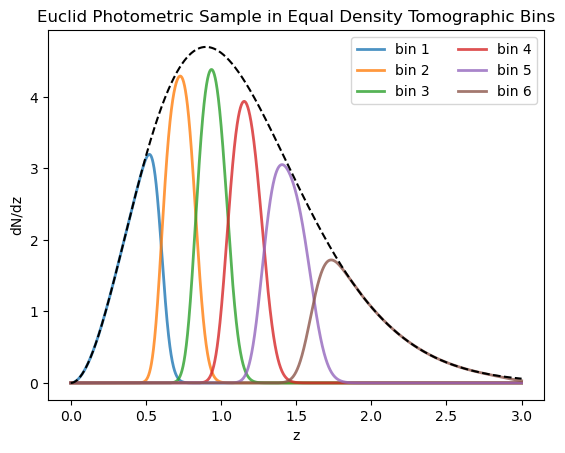

In [15]:
plt.title('Euclid Photometric Sample in Equal Density Tomographic Bins')
for i in range(nbins):
    plt.plot(z, (tomo_nz[i]/n_arcmin2)*nbins, alpha=0.8, lw=2,label=f'bin {i+1}')
plt.plot(z, dndz/n_arcmin2*nbins, ls='--', c='k')
plt.legend(ncol=2)
plt.ylabel('dN/dz')
plt.xlabel('z')
#plt.savefig('euclid_photo_tomo_bins.png', dpi=300)
plt.show()

In [16]:
# Save all bins to a folder:
output_dir = '../../fake_data/redshift_distributions/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
# save the n(z)s in Roberts OneCovariance format
c = 0
for i in range(len(tomo_nz_spec)):
    file_name = f'Euclid_spec_tomo_bin_{i}.dat'
    # checks if output directory exists, creates it if not
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    # saves the file
    print(f"Saving {file_name} in {output_dir}")
    # np.savetxt(output_dir + file_name, np.column_stack((z, tomo_nz_spec[i])),
    #            header='z dN/dz', fmt='%10.6f %10.6f', delimiter=',')
    c+=1

for i in range(len(tomo_nz)):
    print
    file_name = f'Euclid_sources_tomo_bin_{c}.dat'
    # checks if output directory exists, creates it if not
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    # saves the file
    print(f"Saving {file_name} in {output_dir}")
    # np.savetxt(output_dir + file_name, np.column_stack((z, tomo_nz[i])),
    #            header='z dN/dz', fmt='%10.6f %10.6f', delimiter=',')
    c+=1


Saving Euclid_spec_tomo_bin_0.dat in ../../fake_data/redshift_distributions/
Saving Euclid_spec_tomo_bin_1.dat in ../../fake_data/redshift_distributions/
Saving Euclid_spec_tomo_bin_2.dat in ../../fake_data/redshift_distributions/
Saving Euclid_spec_tomo_bin_3.dat in ../../fake_data/redshift_distributions/
Saving Euclid_spec_tomo_bin_4.dat in ../../fake_data/redshift_distributions/
Saving Euclid_spec_tomo_bin_5.dat in ../../fake_data/redshift_distributions/
Saving Euclid_spec_tomo_bin_6.dat in ../../fake_data/redshift_distributions/
Saving Euclid_spec_tomo_bin_7.dat in ../../fake_data/redshift_distributions/
Saving Euclid_spec_tomo_bin_8.dat in ../../fake_data/redshift_distributions/
Saving Euclid_spec_tomo_bin_9.dat in ../../fake_data/redshift_distributions/
Saving Euclid_spec_tomo_bin_10.dat in ../../fake_data/redshift_distributions/
Saving Euclid_spec_tomo_bin_11.dat in ../../fake_data/redshift_distributions/
Saving Euclid_spec_tomo_bin_12.dat in ../../fake_data/redshift_distributio

In [17]:
# Reshape the bias to coincide with the shape of the redshift:
print(np.shape(np.tile(bz, 11).reshape(11, 3024)), np.shape(z))

(11, 3024) (3024,)


In [19]:
# saves the bias for 11 bins in the format z, bias_1, bias_2, ...
file_name = f'{output_dir}Euclid_lens_bias.dat'
# checks if output directory exists, creates it if not
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
# saves the file
print(f"Saving {file_name} in {output_dir}")
# np.savetxt(file_name, np.c_[((z, np.tile(bz, 11).reshape(11, 3024).T))],
#            #header='z bias_1 bias_2 bias_3', 
#            #fmt='%10.6f %10.6f %10.6f %10.6f',
#            delimiter=',')

Saving ../../fake_data/redshift_distributions/Euclid_lens_bias.dat in ../../fake_data/redshift_distributions/


In [10]:
# Now we define the tracers for each of the tomographic bins:
# NOTE: We calculate the tracers for "cosmo"; the LCDM cosmology of massless neutrinos.

# Weak lensing tracers:
lens = {i: ccl.WeakLensingTracer(cosmo, dndz=(z, tomo_nz[i])) 
        for i in range(0, len(tomo_nz))}

# Galaxy clustering tracers, for photometric bins, with Redshift Space Distortions (RSD):
clust_rsd = {i: ccl.NumberCountsTracer(cosmo, dndz=(z, tomo_nz[i]), has_rsd=True, bias=(z,bz),) 
             for i in range(0, len(tomo_nz))}

# Galaxy clustering tracers, spectroscopic bins, with Redshift Space Distortions (RSD):
clust_rsd_spec = {i: ccl.NumberCountsTracer(cosmo, dndz=(z, tomo_nz_spec[i]), has_rsd=True, bias=(z,bz),) 
                  for i in range(0, len(tomo_nz_spec))}

In [11]:
# Create new Cosmology object with a given set of parameters. This keeps track
# of previously-computed cosmological functions
cosmo = ccl.Cosmology(
    Omega_c=0.27, Omega_b=0.045, h=0.67, A_s=2.1e-9, n_s=0.96,
    transfer_function='boltzmann_camb', m_nu=0.0, mass_split='equal')

# Create objects to represent tracers of the weak lensing signal with this
# number density (with has_intrinsic_alignment=False)
lens1 = ccl.WeakLensingTracer(cosmo, dndz=(z, tomo_nz[3]))
lens2 = ccl.WeakLensingTracer(cosmo, dndz=(z, tomo_nz[4]))
ell = np.arange(2, 700)

In [12]:
# Galaxy clustering auto correlations for cosmology of massless neutrinos:
cls_auto_massless = {i: ccl.angular_cl(cosmo, clust_rsd[i], clust_rsd[i], ell, l_limber=700) 
                     for i in range(0, len(tomo_nz))}
#cls_limb = ccl.angular_cl(cosmo, clust_rsd[4], clust_rsd[4], ell, l_limber=60)

In [13]:
# Galaxy clustering auto correlations for cosmology of massive neutrinos: 
cls_nu = {i: ccl.angular_cl(cosmo_neutrino, clust_rsd[i], clust_rsd[i], ell, l_limber=700) 
                     for i in range(0, len(tomo_nz))}

In [14]:
# Galaxy clustering auto correlations for cosmology where the lightest neutrino is massless; give the known massdifferences from solar and atmospheric neutrinos:
cls_nu_m00 = {i: ccl.angular_cl(cosmo_neutrino_m0_massless, clust_rsd[i], clust_rsd[i], ell, l_limber=700) 
                     for i in range(0, len(tomo_nz))}

# testing if the cosmology in the tracer definition makes a difference

In [15]:
# Now we define the galaxy clustering tracer for a cosmology containing massive neutrinos ordered according to the normal hierarchy (NH); for all photometric bins
clust_rsd_neutr = {i: ccl.NumberCountsTracer(cosmo_neutrino, dndz=(z, tomo_nz[i]), has_rsd=True, bias=(z,bz),) 
                     for i in range(0, len(tomo_nz))}

In [16]:
# Define the auto correlation of the GC tracer defined in the previous cell, do this for all photometric bins:
cls_tracer_neutrino = {i: ccl.angular_cl(cosmo_neutrino, clust_rsd_neutr[i], clust_rsd_neutr[i], ell, l_limber=550) 
                       for i in range(0, len(tomo_nz))}

Text(0, 0.5, '$C_\\ell$')

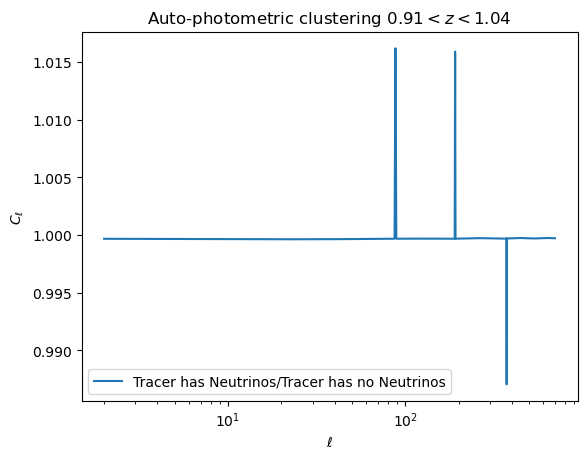

In [ ]:
# Plot the ratio of GC auto correlations; plot the one based on massive neutrino tracers over the GC auto correlation of massless neutrino cosmology:
plt.title(r"Auto-photometric clustering $0.91 < z< 1.04$")
# plt.plot(ell, cls_auto_massless[4], label='All Massless Neutrinos')
plt.plot(ell, cls_tracer_neutrino[4]/cls_nu[4], label=r'Tracer has Neutrinos/Tracer has no Neutrinos')
#plt.plot(ell, , label=r'Normal Hierarchy $m_{\nu}^0 = 0.081$ eV')
# plt.plot(ell, cls_nu_m00[4], label=r'Normal Hierarchy $m_{\nu}^0$ massless')
plt.xscale('log')
#plt.yscale('log')
plt.legend(loc=0)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_\ell$')

In [ ]:
# Define Gaussian diagonal covariance to the auto correlations:

def gaussian_diag_cov(ells, Cls, noise, fsky, nbins, auto_only=True):
    fact_sky = 1./(fsky*(2*ells+1))
    cov = {k: np.zeros_like(ck) for k, ck in Cls.items()}

    if auto_only:
        for i in range(len(cov)):
            cov[i] = fact_sky*((Cls[i] + noise[i]*noise[i])**2 + (Cls[i] + noise[i]*noise[i])*(Cls[i] + noise[i]*noise[i]))
    else:
        for i in range(nbins):
            for j in range(i, nbins):
                if i == j:
                    cov[(i,j)] = fact_sky*((Cls[(i,j)] + noise[i]*noise[j])**2 + 
                                           (Cls[(i,i)] + noise[i]*noise[j])*(Cls[(j,j)] + noise[i]*noise[j]))
                else:
                    cov[(i,j)] = fact_sky*((Cls[(i,j)])**2 + (Cls[(i,i)])*(Cls[(j,j)]))
    return cov

euclid_photo_nbar = 0.3*np.ones(nbins)*(60**2)*(180/np.pi)**2 #FIXME: make sure this is correct!
euclid_sigma_e = 0.28*np.ones_like(euclid_photo_nbar)
euclid_noise_lensing = euclid_sigma_e**2/(euclid_photo_nbar*2)
euclid_noise_ph_gc = 1./euclid_photo_nbar

In [32]:
cov_ph_gc = gaussian_diag_cov(ell, cls_auto_massless, euclid_noise_ph_gc, 0.36, nbins)
cov_ph_gc_2 = gaussian_diag_cov(ell, cls_nu, euclid_noise_ph_gc, 0.36, nbins)

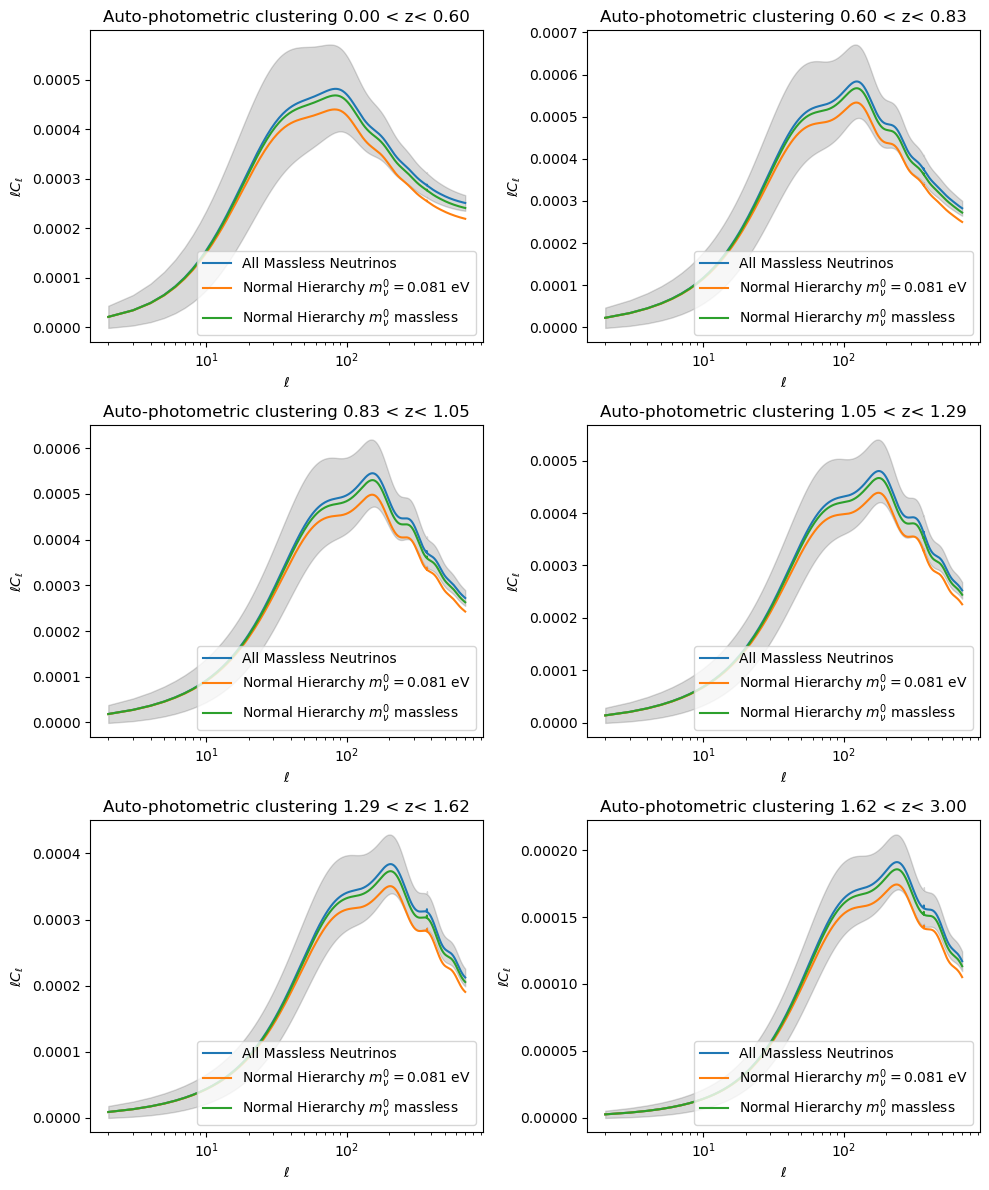

In [36]:
# Plot the effective difference in the auto correlations of the galaxy clustering, for:
# - massless neutrinos
# - massive neutrinos
# - massless lightest neutrino

fig, axs = plt.subplots(3, 2, figsize=(10, 12))  # Create a 5x2 grid of subplots
axs = axs.ravel()  # Flatten the array of axes

fact=ell

for i, (key, value) in enumerate(cls_auto_massless.items()):  # Assuming cls is a dictionary
    #axs[i].plot(ell, value, label=f'{key}')
    axs[i].plot(ell, fact*cls_auto_massless[key], label='All Massless Neutrinos')
    axs[i].plot(ell, fact*cls_nu[key], label=r'Normal Hierarchy $m_{\nu}^0 = 0.081$ eV')
    axs[i].plot(ell, fact*cls_nu_m00[key], label=r'Normal Hierarchy $m_{\nu}^0$ massless')

    # Plot the uncertainty within the massless neutrino galaxy clustering auto correlations due to the noise generated:
    axs[i].fill_between(ell, fact*(cls_auto_massless[key] + np.sqrt(cov_ph_gc[i])), 
                        fact*(cls_auto_massless[key] - np.sqrt(cov_ph_gc[i])), color='k', alpha=0.15)
    axs[i].set_xscale('log')
    axs[i].set_title(f"Auto-photometric clustering {zbins[i][0]:.2f} < z< {zbins[i][1]:.2f}")
    axs[i].set_xlabel(r'$\ell$')
    axs[i].set_ylabel(r'$\ell C_\ell$')
    axs[i].legend(loc=0)

plt.tight_layout()  # Adjust the layout so that the plots do not overlap
plt.show()

In [35]:
average_z = np.array([np.mean(bin) for bin in zbins])

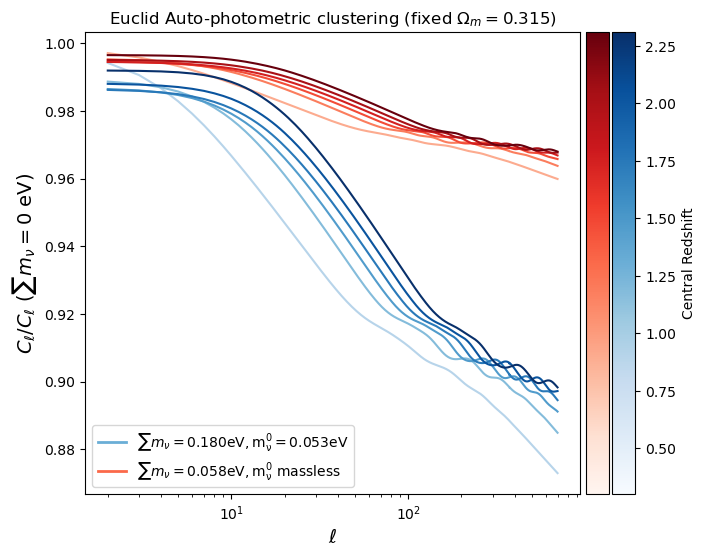

In [37]:
# Plot the fraction of auto correlations of massive neutrinos and a massless lightest neutrino, both over
# the auto correlation of galaxy clustering for massless neutrinos cosmology. 

fig, ax = plt.subplots(figsize=(8, 6))
plt.title(r"Euclid Auto-photometric clustering (fixed $\Omega_m=0.315$)")
colors = cm.Blues(np.linspace(0.3, 1, len(cls_auto_massless)))
colors_r = cm.Reds(np.linspace(0.3, 1, len(cls_auto_massless)))

i=0
for color, (key, value) in zip(colors, cls_auto_massless.items()):
    plt.plot(ell, cls_nu[key]/cls_auto_massless[key], color=colors[key], )#label=f'{key} sum = 0.26 eV')
    # plt.fill_between(ell, 1-np.sqrt(cov_ph_gc_2[i]/cls_auto_massless[key]),
    #                  1+np.sqrt(cov_ph_gc_2[i]/cls_auto_massless[key]), color=colors[key])
    plt.plot(ell, cls_nu_m00[key]/cls_auto_massless[key], color=colors_r[key], )#label=f'{key} but first is massless')
    i+=1
plt.xscale('log')
#plt.legend(loc=0)
plt.xlabel(r'$\ell$', fontsize=14)
plt.ylabel(r'$C_\ell/C_{\ell}$ $(\sum m_{\nu}=0$ eV)', fontsize=14)

# Create a ScalarMappable object for each colormap
sm = mpl.cm.ScalarMappable(cmap=cm.Blues, norm=plt.Normalize(vmin=average_z.min(), vmax=average_z.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', label='Central Redshift', pad=-0.1)

sm_r = mpl.cm.ScalarMappable(cmap=cm.Reds, norm=plt.Normalize(vmin=average_z.min(), vmax=average_z.max()))
sm_r.set_array([])
cbar_r = plt.colorbar(sm_r, ax=ax, orientation='vertical', pad=0.01)

# Remove ticks and labels from the Reds colorbar
cbar_r.ax.yaxis.set_ticks([])
#cbar_r.ax.yaxis.set_label_position('none')
# Create custom legend
custom_lines = [Line2D([0], [0], color=cm.Blues(0.5), lw=2),
                Line2D([0], [0], color=cm.Reds(0.5), lw=2)]
plt.legend(custom_lines, [r'$\sum m_{\nu}=0.180 \rm{eV}, m_{\nu}^0=0.053 \rm{eV}$', 
                          r'$\sum m_{\nu}=0.058 \rm{eV}, m_{\nu}^0$ massless'])

# Move the labels and ticks to the right in the Blues colorbar
cbar.ax.yaxis.tick_right()
cbar.ax.yaxis.set_label_position('right')
#plt.savefig('euclid_auto_photoclustering.png', dpi=300)
plt.show()

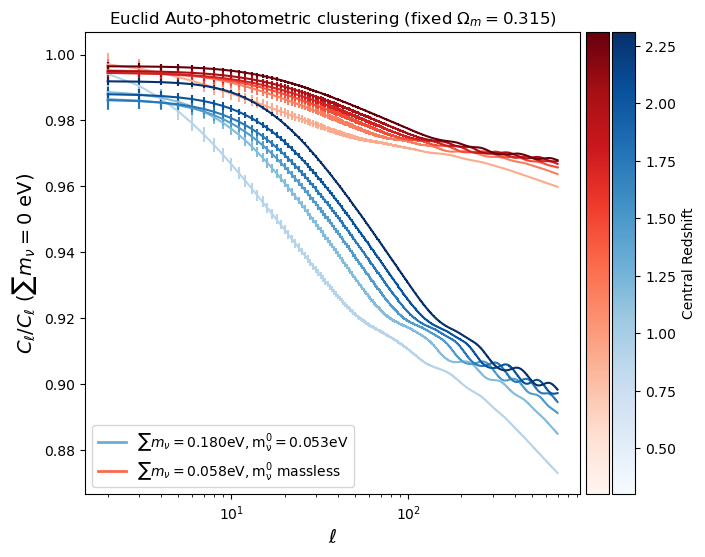

In [ ]:
# Make the same plot as above but include errorbars:

fig, ax = plt.subplots(figsize=(8, 6))
plt.title(r"Euclid Auto-photometric clustering (fixed $\Omega_m=0.315$)")
colors = cm.Blues(np.linspace(0.3, 1, len(cls_auto_massless)))
colors_r = cm.Reds(np.linspace(0.3, 1, len(cls_auto_massless)))

i=0
for color, (key, value) in zip(colors, cls_auto_massless.items()):
    plt.errorbar(ell, cls_nu[key]/cls_auto_massless[key], yerr=np.sqrt(cov_ph_gc_2[i]/cls_auto_massless[key]),
                 color=colors[key], )#label=f'{key} sum = 0.26 eV')
    # plt.fill_between(ell, 1-np.sqrt(cov_ph_gc_2[i]/cls_auto_massless[key]),
    #                  1+np.sqrt(cov_ph_gc_2[i]/cls_auto_massless[key]), color=colors[key])
    plt.errorbar(ell, cls_nu_m00[key]/cls_auto_massless[key], yerr=np.sqrt(cov_ph_gc_2[i]/cls_auto_massless[key]), 
                 color=colors_r[key], )#label=f'{key} but first is massless')
    i+=1
plt.xscale('log')
#plt.legend(loc=0)
plt.xlabel(r'$\ell$', fontsize=14)
plt.ylabel(r'$C_\ell/C_{\ell}$ $(\sum m_{\nu}=0$ eV)', fontsize=14)

# Create a ScalarMappable object for each colormap
sm = mpl.cm.ScalarMappable(cmap=cm.Blues, norm=plt.Normalize(vmin=average_z.min(), vmax=average_z.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', label='Central Redshift', pad=-0.1)

sm_r = mpl.cm.ScalarMappable(cmap=cm.Reds, norm=plt.Normalize(vmin=average_z.min(), vmax=average_z.max()))
sm_r.set_array([])
cbar_r = plt.colorbar(sm_r, ax=ax, orientation='vertical', pad=0.01)

# Remove ticks and labels from the Reds colorbar
cbar_r.ax.yaxis.set_ticks([])
#cbar_r.ax.yaxis.set_label_position('none')
# Create custom legend
custom_lines = [Line2D([0], [0], color=cm.Blues(0.5), lw=2),
                Line2D([0], [0], color=cm.Reds(0.5), lw=2)]
plt.legend(custom_lines, [r'$\sum m_{\nu}=0.180 \rm{eV}, m_{\nu}^0=0.053 \rm{eV}$', 
                          r'$\sum m_{\nu}=0.058 \rm{eV}, m_{\nu}^0$ massless'])

# Move the labels and ticks to the right in the Blues colorbar
cbar.ax.yaxis.tick_right()
cbar.ax.yaxis.set_label_position('right')
#plt.savefig('euclid_auto_photoclustering.png', dpi=300)
plt.show()

# Lensing now

In [17]:
# Now we look at the auto correlations of the weak lensing probe which we defined above.

# The weaklensing tracer if the comsology containing only massless neutrinos:
ell_lensing = np.arange(2, 3000)
wl_cls_auto_massless = {(i,j): ccl.angular_cl(cosmo, lens[i], lens[j], ell_lensing, l_limber=3600) 
                        for i in range(0, len(tomo_nz)) for j in range(i, len(tomo_nz))} # using photometric tomorgaphic bins

In [40]:
wl_cls_auto_massless.keys()

dict_keys([(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 2), (2, 3), (2, 4), (2, 5), (3, 3), (3, 4), (3, 5), (4, 4), (4, 5), (5, 5)])

In [18]:
# For a cosmology with only massive neutrinos, ordered according to the normal hierarchy:
wl_cls_nu = {(i,j): ccl.angular_cl(cosmo_neutrino, lens[i], lens[j], ell_lensing, l_limber=3600) 
             for i in range(0, len(tomo_nz)) for j in range(i, len(tomo_nz))} # using photometric tomorgaphic bins

In [19]:
# The WL auto correlations for the cosmology containing one massless lightest neutrino, 2 massive neutrinos according to the measured mass differences from solar and atmospheric neutrinos
wl_cls_nu_m00 = {(i,j): ccl.angular_cl(cosmo_neutrino_m0_massless, lens[i], lens[j], ell_lensing, l_limber=3600) 
                for i in range(0, len(tomo_nz)) for j in range(i, len(tomo_nz))} # using photometric tomorgaphic bins

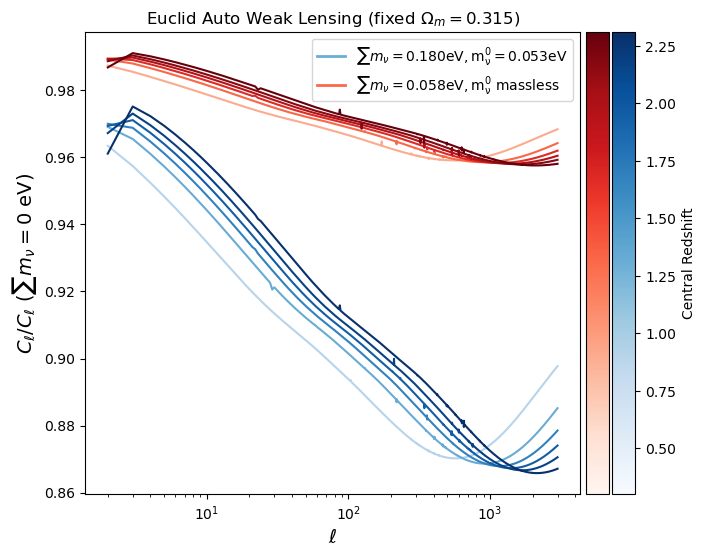

In [44]:
# Using the auto-correlations for the WL tracers defined above, we plot the ratios of auto correlations of massive neutrinos over massless neutrinos, for both cases of the
# massive neutrinos:

fig, ax = plt.subplots(figsize=(8, 6))
plt.title(r"Euclid Auto Weak Lensing (fixed $\Omega_m=0.315$)")
colors = cm.Blues(np.linspace(0.3, 1, len(wl_cls_nu_m00)))
colors_r = cm.Reds(np.linspace(0.3, 1, len(wl_cls_nu_m00)))

i=0
for color, (key, value) in zip(colors, wl_cls_auto_massless.items()):
    if key[0] == key[1]:
        plt.plot(ell_lensing, wl_cls_nu[key]/wl_cls_auto_massless[key], color=colors[i], )#label=f'{key} sum = 0.26 eV')
        plt.plot(ell_lensing, wl_cls_nu_m00[key]/wl_cls_auto_massless[key], color=colors_r[i], )#label=f'{key} but first is massless')
    i+=1

plt.xscale('log')
#plt.legend(loc=0)
plt.xlabel(r'$\ell$', fontsize=14)
plt.ylabel(r'$C_\ell/C_{\ell}$ $(\sum m_{\nu}=0$ eV)', fontsize=14)

# Create a ScalarMappable object for each colormap
sm = mpl.cm.ScalarMappable(cmap=cm.Blues, norm=plt.Normalize(vmin=average_z.min(), vmax=average_z.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', label='Central Redshift', pad=-0.1)

sm_r = mpl.cm.ScalarMappable(cmap=cm.Reds, norm=plt.Normalize(vmin=average_z.min(), vmax=average_z.max()))
sm_r.set_array([])
cbar_r = plt.colorbar(sm_r, ax=ax, orientation='vertical', pad=0.01)

# Remove ticks and labels from the Reds colorbar
cbar_r.ax.yaxis.set_ticks([])
#cbar_r.ax.yaxis.set_label_position('none')
# Create custom legend
custom_lines = [Line2D([0], [0], color=cm.Blues(0.5), lw=2),
                Line2D([0], [0], color=cm.Reds(0.5), lw=2)]
plt.legend(custom_lines, [r'$\sum m_{\nu}=0.180 \rm{eV}, m_{\nu}^0=0.053 \rm{eV}$', 
                          r'$\sum m_{\nu}=0.058 \rm{eV}, m_{\nu}^0$ massless'])

# Move the labels and ticks to the right in the Blues colorbar
cbar.ax.yaxis.tick_right()
cbar.ax.yaxis.set_label_position('right')
#plt.savefig('euclid_auto_weak_lensing.png', dpi=300)
plt.show()

**Q: Is it weird that the fraction is never one, in both cases?**

# GGL

In [20]:
# Now we turn to the cross-correlation between galaxy clustering and weak lensing, often referred to as Galaxy Galaxy Lensing.

# Define the cross-correlations for the 3 different cosmologies again and use the photometric bins we have define earlier:
# Massless neutrinos:
ggl_cls_auto_massless = {i: ccl.angular_cl(cosmo, clust_rsd[i], lens[i+1], ell, l_limber=600) 
                     for i in range(0, len(tomo_nz)-1)}

# Massive neutrinos in NH:
ggl_cls_nu = {i: ccl.angular_cl(cosmo_neutrino, clust_rsd[i], lens[i+1], ell, l_limber=600) 
                     for i in range(0, len(tomo_nz)-1)}

# 2 massive neutrinos with masses equivalent to the measures mass differences from solar and atmospheric neutrinos and the lightest neutrino is massless:
ggl_cls_nu_m00 = {i: ccl.angular_cl(cosmo_neutrino_m0_massless, clust_rsd[i], lens[i+1], ell, l_limber=600) 
                     for i in range(0, len(tomo_nz)-1)}

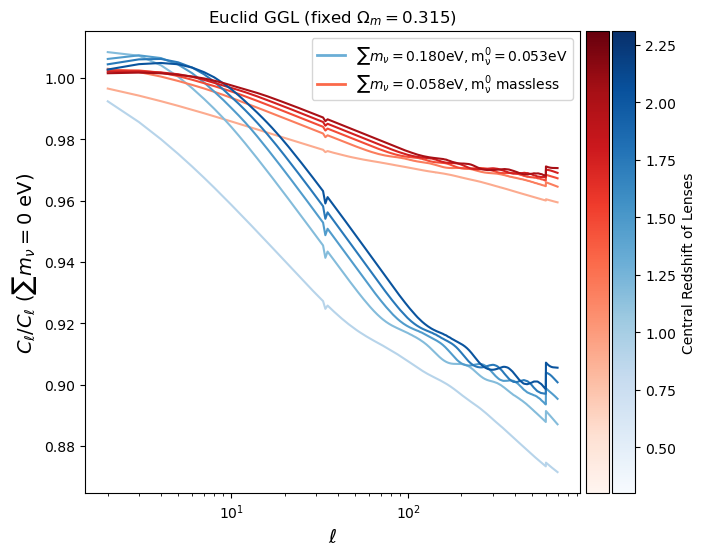

In [46]:
# We now make a similar plot for the galaxy galaxy lensing cross-correlations:

fig, ax = plt.subplots(figsize=(8, 6))
plt.title(r"Euclid GGL (fixed $\Omega_m=0.315$)")
colors = cm.Blues(np.linspace(0.3, 1, len(cls_auto_massless)))
colors_r = cm.Reds(np.linspace(0.3, 1, len(cls_auto_massless)))


for color, (key, value) in zip(colors, ggl_cls_auto_massless.items()):
    plt.plot(ell, ggl_cls_nu[key]/ggl_cls_auto_massless[key], color=colors[key], )#label=f'{key} sum = 0.26 eV')
    plt.plot(ell, ggl_cls_nu_m00[key]/ggl_cls_auto_massless[key], color=colors_r[key], )#label=f'{key} but first is massless')

plt.xscale('log')
#plt.legend(loc=0)
plt.xlabel(r'$\ell$', fontsize=14)
plt.ylabel(r'$C_\ell/C_{\ell}$ $(\sum m_{\nu}=0$ eV)', fontsize=14)

# Create a ScalarMappable object for each colormap
sm = mpl.cm.ScalarMappable(cmap=cm.Blues, norm=plt.Normalize(vmin=average_z.min(), vmax=average_z.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', label='Central Redshift of Lenses', pad=-0.1)

sm_r = mpl.cm.ScalarMappable(cmap=cm.Reds, norm=plt.Normalize(vmin=average_z.min(), vmax=average_z.max()))
sm_r.set_array([])
cbar_r = plt.colorbar(sm_r, ax=ax, orientation='vertical', pad=0.01)

# Remove ticks and labels from the Reds colorbar
cbar_r.ax.yaxis.set_ticks([])
#cbar_r.ax.yaxis.set_label_position('none')
# Create custom legend
custom_lines = [Line2D([0], [0], color=cm.Blues(0.5), lw=2),
                Line2D([0], [0], color=cm.Reds(0.5), lw=2)]
plt.legend(custom_lines, [r'$\sum m_{\nu}=0.180 \rm{eV}, m_{\nu}^0=0.053 \rm{eV}$', 
                          r'$\sum m_{\nu}=0.058 \rm{eV}, m_{\nu}^0$ massless'])

# Move the labels and ticks to the right in the Blues colorbar
cbar.ax.yaxis.tick_right()
cbar.ax.yaxis.set_label_position('right')
#plt.savefig('euclid_ggl.png', dpi=300)
plt.show()

# Spec Euclid Clustering
Utilizing the spectroscopic instrument of Euclid, we can also define auto and cross-correlations of the spectroscopic survey.  

In [21]:
# First we define the spectroscopic galaxy clustering tracer, for a cosmology of massless neutrinos, and spectrocopice redshift bins:
clust_rsd_spec = {i: ccl.NumberCountsTracer(cosmo, dndz=(z, tomo_nz_spec[i]), has_rsd=True, bias=(z,bz),) 
                  for i in range(0, len(tomo_nz_spec))}

In [22]:
# Using the tracer we defined above, let us define:
# The spectroscopic galaxy clustering auto correlation, for a cosmology of massless neutrinos, and spectrocopice redshift bins:
cls_auto_massless_spec = {i: ccl.angular_cl(cosmo, clust_rsd_spec[i], clust_rsd_spec[i], ell, l_limber=1) 
                         for i in range(0, len(tomo_nz_spec))}

In [23]:
# Spectroscopic galaxy clustering auto correlation, for a cosmology of massive neutrinos, and spectrocopice redshift bins:
cls_nu_spec = {i: ccl.angular_cl(cosmo_neutrino, clust_rsd_spec[i], clust_rsd_spec[i], ell, l_limber=1) 
                     for i in range(0, len(tomo_nz_spec))}

In [24]:
# Spectroscopic galaxy clustering auto correlation, for a cosmology of a massless lightest neutrino and two massive neutrinos with masses equal to the measured
# mass differences from solar and atmospheric neutrinos, and spectrocopice redshift bins:
cls_nu_m00_spec = {i: ccl.angular_cl(cosmo_neutrino_m0_massless, clust_rsd_spec[i], clust_rsd_spec[i], ell, l_limber=1) 
                     for i in range(0, len(tomo_nz_spec))}

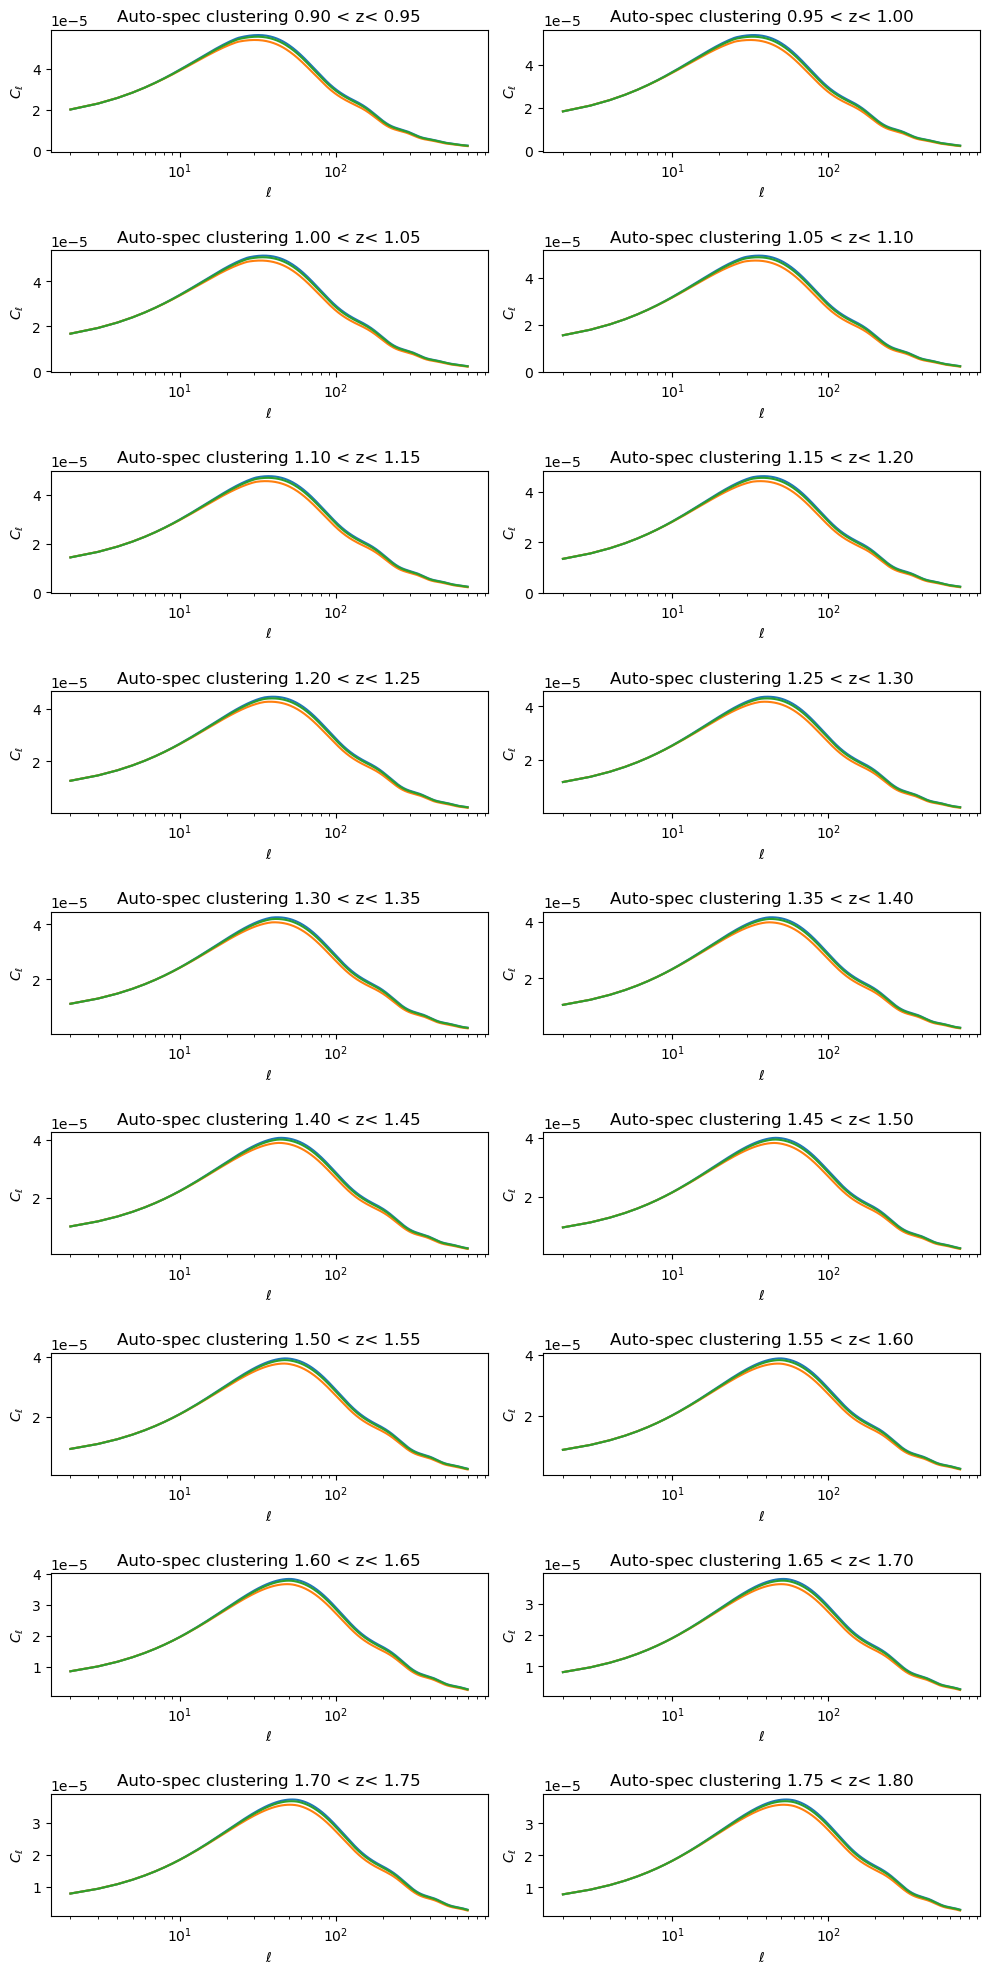

In [ ]:
# Plot the auto correlations of the spectrocopic galaxy clustering for each different redshift bin:
fig, axs = plt.subplots(9, 2, figsize=(10, 20))  # Create a 5x2 grid of subplots
axs = axs.ravel()  # Flatten the array of axes

for i, (key, value) in enumerate(cls_auto_massless_spec.items()):  # Assuming cls is a dictionary
    #axs[i].plot(ell, value, label=f'{key}')
    axs[i].plot(ell, cls_auto_massless_spec[key], label='All Massless Neutrinos')
    axs[i].plot(ell, cls_nu_spec[key], label=r'$m_{\nu}^0 = 0.081$ eV')
    axs[i].plot(ell, cls_nu_m00_spec[key], label=r'$m_{\nu}^0$ massless')
    axs[i].set_xscale('log')
    axs[i].set_title(f"Auto-spec clustering {zbins_spec[i][0]:.2f} < z< {zbins_spec[i][1]:.2f}")
    axs[i].set_xlabel(r'$\ell$')
    axs[i].set_ylabel(r'$C_\ell$')
    #axs[i].legend(loc=0)

plt.tight_layout()  # Adjust the layout so that the plots do not overlap
plt.show()

In [52]:
cls_auto_massless_spec.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])

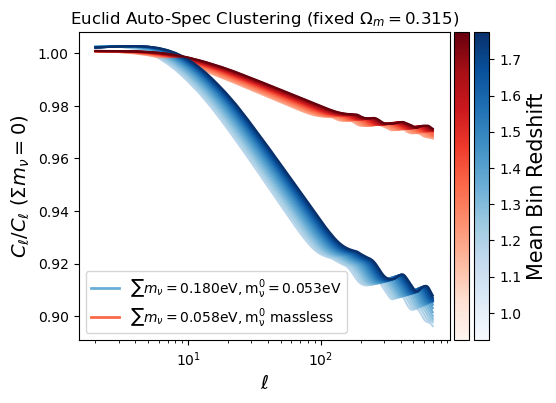

In [53]:
# Plot the ratios of massive neutrino auto correlations over massless neutrino auto correlations:
average_z_spec = np.array([np.mean(bin) for bin in zbins_spec])

fig, ax = plt.subplots(figsize=(6, 4))
plt.title(r"Euclid Auto-Spec Clustering (fixed $\Omega_m=0.315$)")
colors = cm.Blues(np.linspace(0.3, 1, len(cls_auto_massless_spec)))
colors_r = cm.Reds(np.linspace(0.3, 1, len(cls_auto_massless_spec)))


for color, (key, value) in zip(colors, cls_auto_massless_spec.items()):
    #print(key)
    if key == 19:
        print(">>>", key)
        pass
    else:
        #print(key)
        plt.plot(ell, cls_nu_spec[key]/cls_auto_massless_spec[key], color=colors[key], )#label=f'{key} sum = 0.26 eV')
        plt.plot(ell, cls_nu_m00_spec[key]/cls_auto_massless_spec[key], color=colors_r[key], )#label=f'{key} but first is massless')

plt.xscale('log')
#plt.legend(loc=0)
plt.xlabel(r'$\ell$', fontsize=14)
plt.ylabel(r'$C_{\ell}/C_{\ell}$ $(\Sigma m_{\nu}=0$)', fontsize=14)

# Create a ScalarMappable object for each colormap
sm = mpl.cm.ScalarMappable(cmap=cm.Blues, norm=plt.Normalize(vmin=average_z_spec.min(), vmax=average_z_spec.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical',  pad=-0.1)
cbar.set_label('Mean Bin Redshift', size=15) 

sm_r = mpl.cm.ScalarMappable(cmap=cm.Reds, norm=plt.Normalize(vmin=average_z_spec.min(), vmax=average_z_spec.max()))
sm_r.set_array([])
cbar_r = plt.colorbar(sm_r, ax=ax, orientation='vertical', pad=0.01)

# Remove ticks and labels from the Reds colorbar
cbar_r.ax.yaxis.set_ticks([])
#cbar_r.ax.yaxis.set_label_position('none')
# Create custom legend
custom_lines = [Line2D([0], [0], color=cm.Blues(0.5), lw=2),
                Line2D([0], [0], color=cm.Reds(0.5), lw=2)]
plt.legend(custom_lines, [r'$\sum m_{\nu}=0.180 \rm{eV}, m_{\nu}^0=0.053 \rm{eV}$', 
                          r'$\sum m_{\nu}=0.058 \rm{eV}, m_{\nu}^0$ massless'])

# Move the labels and ticks to the right in the Blues colorbar
cbar.ax.yaxis.tick_right()
cbar.ax.yaxis.set_label_position('right')
#plt.ylim(1.0, 1.)
#plt.savefig('euclid_auto_spec_clustering.png', dpi=300)
plt.show()

# Proposal Figure

In [59]:
ell_lensing = np.arange(2, 3000)
wl_cls_auto_massless = {i: ccl.angular_cl(cosmo, lens[i], lens[i], ell_lensing, l_limber=3600) 
                        for i in range(0, len(tomo_nz))}

In [60]:
wl_cls_nu = {i: ccl.angular_cl(cosmo_neutrino, lens[i], lens[i], ell_lensing, l_limber=3600) 
             for i in range(0, len(tomo_nz))}

In [61]:
wl_cls_nu_m00 = {i: ccl.angular_cl(cosmo_neutrino_m0_massless, lens[i], lens[i], ell_lensing, l_limber=3600) 
                for i in range(0, len(tomo_nz))}

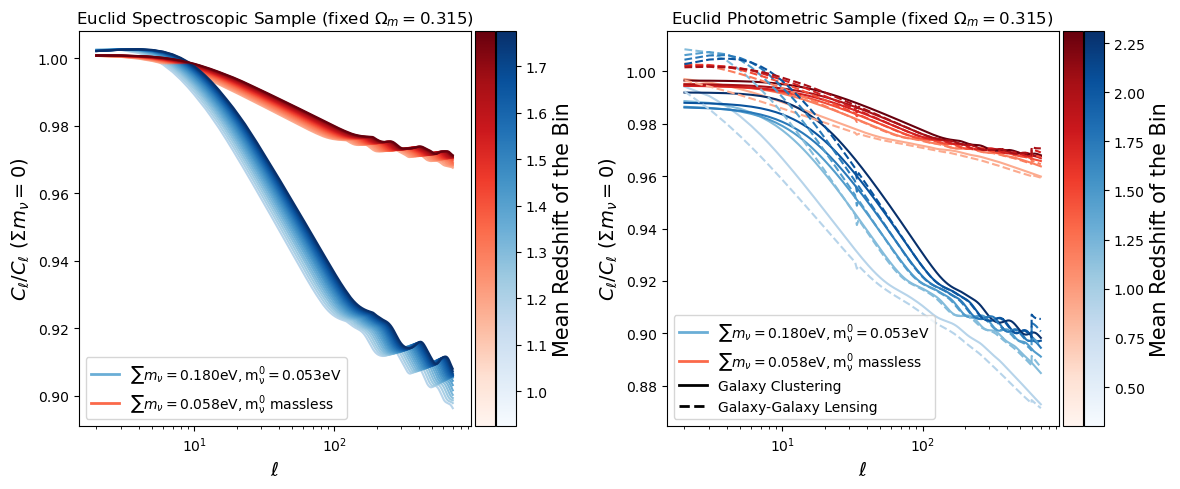

In [54]:
average_z_spec = np.array([np.mean(bin) for bin in zbins_spec])

fig, axs = plt.subplots(ncols=2, figsize=(12, 5))

################# SPEC SAMPLE  #################
axs[0].set_title(r"Euclid Spectroscopic Sample (fixed $\Omega_m=0.315$)")
colors = cm.Blues(np.linspace(0.3, 1, len(cls_auto_massless_spec)))
colors_r = cm.Reds(np.linspace(0.3, 1, len(cls_auto_massless_spec)))


for color, (key, value) in zip(colors, cls_auto_massless_spec.items()):
    axs[0].plot(ell, cls_nu_spec[key]/cls_auto_massless_spec[key], color=colors[key], )#label=f'{key} sum = 0.26 eV')
    axs[0].plot(ell, cls_nu_m00_spec[key]/cls_auto_massless_spec[key], color=colors_r[key], )#label=f'{key} but first is massless')

axs[0].set_xscale('log')
#plt.legend(loc=0)
axs[0].set_xlabel(r'$\ell$', fontsize=14)
axs[0].set_ylabel(r'$C_{\ell}/C_{\ell}$ $(\Sigma m_{\nu}=0$)', fontsize=14)

# Create a ScalarMappable object for each colormap
sm = mpl.cm.ScalarMappable(cmap=cm.Blues, norm=plt.Normalize(vmin=average_z_spec.min(), vmax=average_z_spec.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=axs[0], orientation='vertical',  pad=-0.1)
cbar.set_label('Mean Redshift of the Bin', size=15) 

sm_r = mpl.cm.ScalarMappable(cmap=cm.Reds, norm=plt.Normalize(vmin=average_z_spec.min(), vmax=average_z_spec.max()))
sm_r.set_array([])
cbar_r = plt.colorbar(sm_r, ax=axs[0], orientation='vertical', pad=0.01)

# Remove ticks and labels from the Reds colorbar
cbar_r.ax.yaxis.set_ticks([])
# Create custom legend
custom_lines = [Line2D([0], [0], color=cm.Blues(0.5), lw=2),
                Line2D([0], [0], color=cm.Reds(0.5), lw=2)]
axs[0].legend(custom_lines, [r'$\sum m_{\nu}=0.180 \rm{eV}, m_{\nu}^0=0.053 \rm{eV}$', 
                          r'$\sum m_{\nu}=0.058 \rm{eV}, m_{\nu}^0$ massless'])

# Move the labels and ticks to the right in the Blues colorbar
cbar.ax.yaxis.tick_right()
cbar.ax.yaxis.set_label_position('right')

################# PHOTO SAMPLE  #################
axs[1].set_title(r"Euclid Photometric Sample (fixed $\Omega_m=0.315$)")
colors = cm.Blues(np.linspace(0.3, 1, len(cls_auto_massless)))
colors_r = cm.Reds(np.linspace(0.3, 1, len(cls_auto_massless)))

for color, (key, value) in zip(colors, cls_auto_massless.items()):
    axs[1].plot(ell, cls_nu[key]/cls_auto_massless[key], color=colors[key], )
    axs[1].plot(ell, cls_nu_m00[key]/cls_auto_massless[key], color=colors_r[key], )
for color, (key, value) in zip(colors, ggl_cls_auto_massless.items()):
    axs[1].plot(ell, ggl_cls_nu[key]/ggl_cls_auto_massless[key], ls='--',color=colors[key], )#label=f'{key} sum = 0.26 eV')
    axs[1].plot(ell, ggl_cls_nu_m00[key]/ggl_cls_auto_massless[key], ls='--',color=colors_r[key], )#label=f'{key} but first is massless')
# i=0
# for color, (key, value) in zip(colors, wl_cls_auto_massless.items()):
#     axs[1].plot(ell_lensing, wl_cls_nu[key]/wl_cls_auto_massless[key], ls=':',color=colors[i], )#label=f'{key} sum = 0.26 eV')
#     axs[1].plot(ell_lensing, wl_cls_nu_m00[key]/wl_cls_auto_massless[key], ls=':',color=colors_r[i], )#label=f'{key} but first is massless')
#     i+=1

axs[1].set_xscale('log')
axs[1].set_xlabel(r'$\ell$', fontsize=14)
axs[1].set_ylabel(r'$C_{\ell}/C_{\ell}$ $(\Sigma m_{\nu}=0$)', fontsize=14)

# Create a ScalarMappable object for each colormap
sm = mpl.cm.ScalarMappable(cmap=cm.Blues, norm=plt.Normalize(vmin=average_z.min(), vmax=average_z.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=axs[1], orientation='vertical',  pad=-0.1)
cbar.set_label('Mean Redshift of the Bin', size=15) 

sm_r = mpl.cm.ScalarMappable(cmap=cm.Reds, norm=plt.Normalize(vmin=average_z.min(), vmax=average_z.max()))
sm_r.set_array([])
cbar_r = plt.colorbar(sm_r, ax=axs[1], orientation='vertical', pad=0.01)

# Remove ticks and labels from the Reds colorbar
cbar_r.ax.yaxis.set_ticks([])
# Create custom legend
custom_lines = [Line2D([0], [0], color=cm.Blues(0.5), lw=2),
                Line2D([0], [0], color=cm.Reds(0.5), lw=2),
                Line2D([0], [0], color='k', ls='-',lw=2),
                Line2D([0], [0], color='k', ls='--',lw=2),]
                #Line2D([0], [0], color='k', ls=':',lw=2)]
axs[1].legend(custom_lines, [r'$\sum m_{\nu}=0.180 \rm{eV}, m_{\nu}^0=0.053 \rm{eV}$', 
                          r'$\sum m_{\nu}=0.058 \rm{eV}, m_{\nu}^0$ massless',
                          "Galaxy Clustering",
                          "Galaxy-Galaxy Lensing",])
                          #"Cosmic Shear"])

# Move the labels and ticks to the right in the Blues colorbar
cbar.ax.yaxis.tick_right()
cbar.ax.yaxis.set_label_position('right')
plt.tight_layout()

#saves the figure
#plt.savefig('Euclid_Neutrinos.png', bbox_inches='tight')


# CMB X Correlations

## CMB Lensing x Euclid Spec Clustering

In [25]:
# Now we start to look at the inclusion of CMB lensing in the analysis. Define the CMB lensing tracer for the 3 different neutrino cosmologies:
# Massless neutrinos:
cmb_lensing_tracer = ccl.tracers.CMBLensingTracer(cosmo, z_source=1100, n_samples=5500)

# All massive neutrinos:
cmb_lensing_tracer2 = ccl.tracers.CMBLensingTracer(cosmo_neutrino, z_source=1100, n_samples=5500)

# A  massless lightest neutrino: 
cmb_lensing_tracer3 = ccl.tracers.CMBLensingTracer(cosmo_neutrino_m0_massless, z_source=1100, n_samples=5500)

In [26]:
# NOw we can look at the cross-correlations of the CMB lensing tracer with the tracers we defined before. Note:
# - We do not incorporate the CMB lensing auto correlation since this is (slightly) more cumbersome than the cross-correlations
# - We define the cross-correlations for the same cosmologies.

# First we start with the cross-correlations for photometric galaxy clustering and CMB lensing:
# Massless neutrinos:
specGC_x_cmbLen_masless = {i: ccl.angular_cl(cosmo, cmb_lensing_tracer, clust_rsd_spec[i], ell, l_limber=1120) 
                             for i in range(0, len(tomo_nz))}

# All massive neutrinos:
specGC_x_cmbLen_nu = {i: ccl.angular_cl(cosmo_neutrino, cmb_lensing_tracer2, clust_rsd_spec[i], ell, l_limber=1120) 
                               for i in range(0, len(tomo_nz))}

# A  massless lightest neutrino:
specGC_x_cmbLen_m0massless = {i: ccl.angular_cl(cosmo_neutrino_m0_massless, cmb_lensing_tracer3, clust_rsd_spec[i], ell, l_limber=1120) 
                               for i in range(0, len(tomo_nz))}

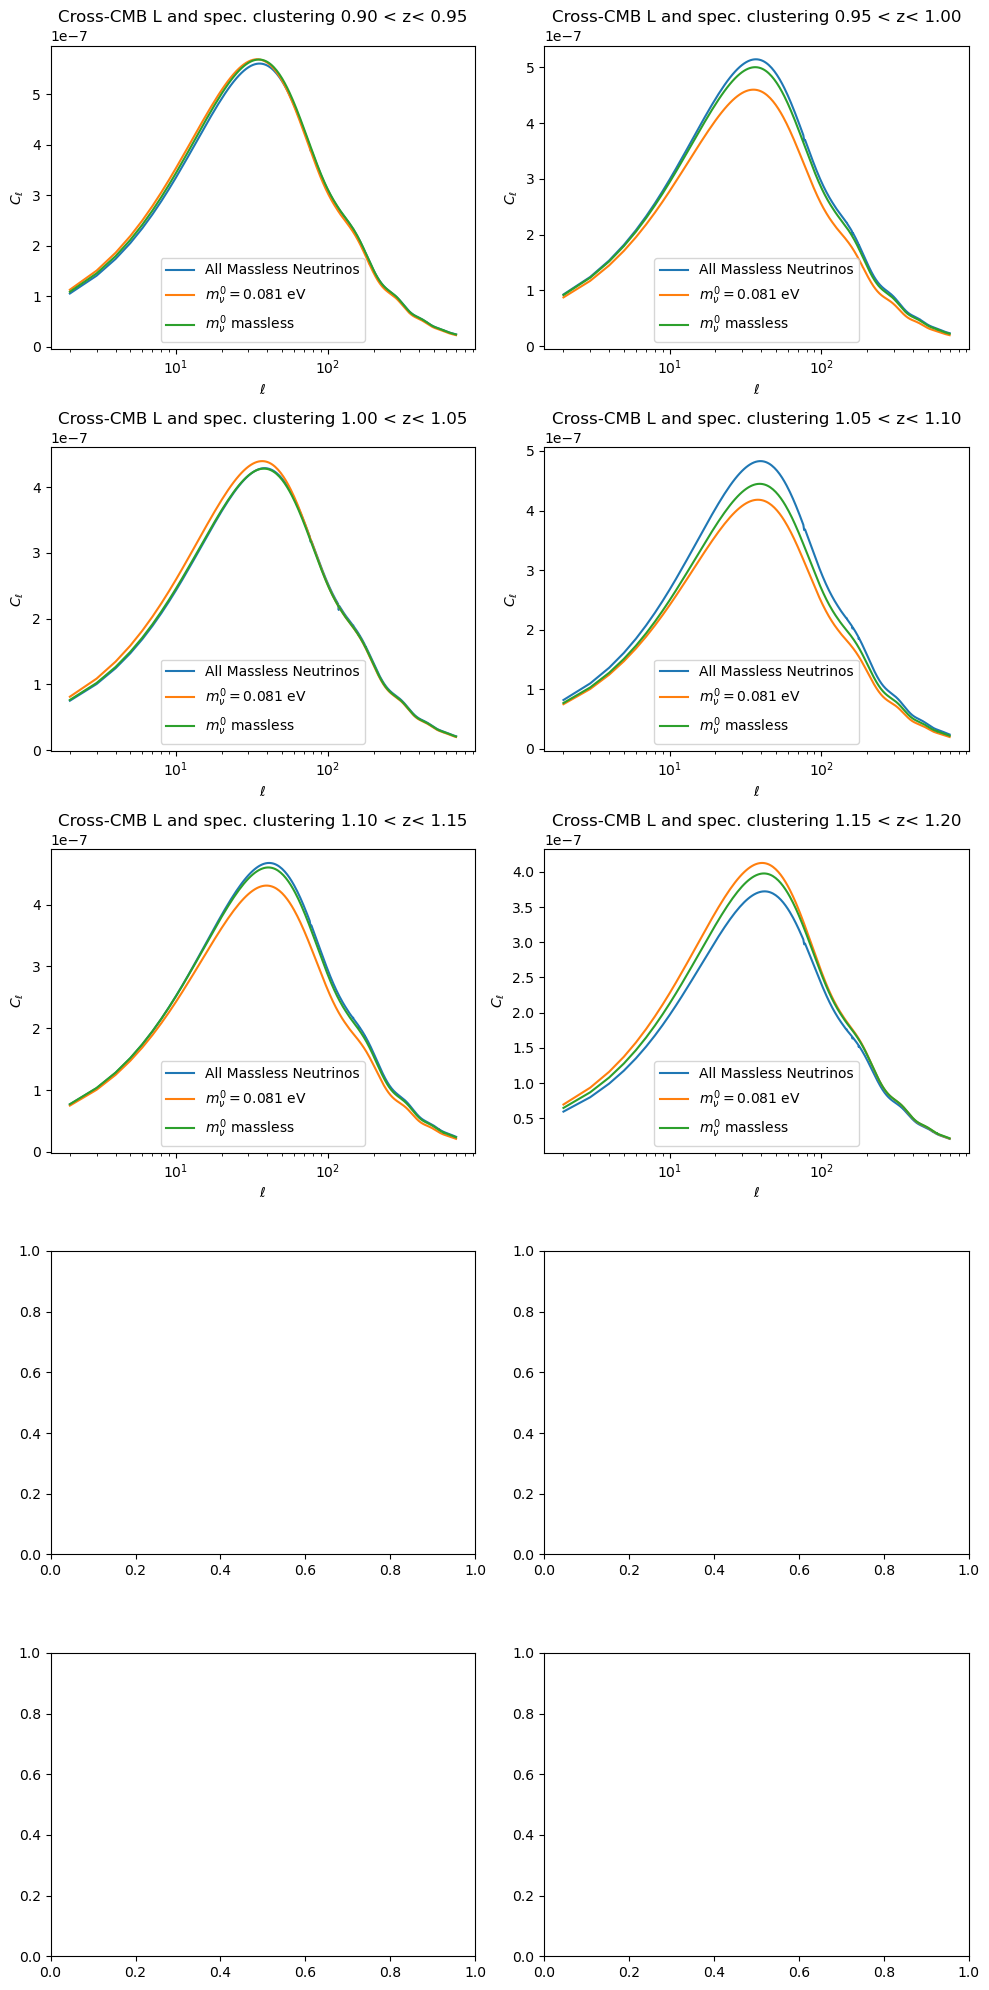

In [59]:
# PLot the different cross correlations in each of the tomographic bins:

fig, axs = plt.subplots(5, 2, figsize=(10, 20))  # Create a 5x2 grid of subplots
axs = axs.ravel()  # Flatten the array of axes

for i, (key, value) in enumerate(specGC_x_cmbLen_masless.items()):  # Assuming cls is a dictionary
    #axs[i].plot(ell, value, label=f'{key}')
    axs[i].plot(ell, specGC_x_cmbLen_masless[key], label='All Massless Neutrinos')
    axs[i].plot(ell, specGC_x_cmbLen_nu[key], label=r'$m_{\nu}^0 = 0.081$ eV')
    axs[i].plot(ell, specGC_x_cmbLen_m0massless[key], label=r'$m_{\nu}^0$ massless')
    axs[i].set_xscale('log')
    axs[i].set_title(f"Cross-CMB L and spec. clustering {zbins_spec[i][0]:.2f} < z< {zbins_spec[i][1]:.2f}")
    axs[i].set_xlabel(r'$\ell$')
    axs[i].set_ylabel(r'$C_\ell$')
    axs[i].legend(loc=0)

plt.tight_layout()  # Adjust the layout so that the plots do not overlap
plt.show()

In [27]:
# If we take the average of the bins:
average_z_spec = np.array([np.mean(bin) for bin in zbins_spec])

# Let us now plot the ratios of the cross-correlations:
fig, ax = plt.subplots(figsize=(6, 4))
plt.title(r"Euclid Spec Clustering x CMB Lensing (fixed $\Omega_m=0.315$)")
colors = cm.Blues(np.linspace(0.3, 1, len(cls_auto_massless_spec)))
colors_r = cm.Reds(np.linspace(0.3, 1, len(cls_auto_massless_spec)))

for color, (key, value) in zip(colors, specGC_x_cmbLen_masless.items()):
        plt.plot(ell, specGC_x_cmbLen_nu[key]/specGC_x_cmbLen_masless[key], color=colors[key], )#label=f'{key} sum = 0.26 eV')
        plt.plot(ell, specGC_x_cmbLen_m0massless[key]/specGC_x_cmbLen_masless[key], color=colors_r[key], )#label=f'{key} but first is massless')

plt.xscale('log')
#plt.legend(loc=0)
plt.xlabel(r'$\ell$', fontsize=14)
plt.ylabel(r'$C_{\ell}/C_{\ell}$ $(\Sigma m_{\nu}=0$)', fontsize=14)

# Create a ScalarMappable object for each colormap
sm = mpl.cm.ScalarMappable(cmap=cm.Blues, norm=plt.Normalize(vmin=average_z_spec.min(), vmax=average_z_spec.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical',  pad=-0.1)
cbar.set_label('Mean Bin Redshift', size=15) 

sm_r = mpl.cm.ScalarMappable(cmap=cm.Reds, norm=plt.Normalize(vmin=average_z_spec.min(), vmax=average_z_spec.max()))
sm_r.set_array([])
cbar_r = plt.colorbar(sm_r, ax=ax, orientation='vertical', pad=0.01)

# Remove ticks and labels from the Reds colorbar
cbar_r.ax.yaxis.set_ticks([])
#cbar_r.ax.yaxis.set_label_position('none')
# Create custom legend
custom_lines = [Line2D([0], [0], color=cm.Blues(0.5), lw=2),
                Line2D([0], [0], color=cm.Reds(0.5), lw=2)]
plt.legend(custom_lines, [r'$\sum m_{\nu}=0.180 \rm{eV}, m_{\nu}^0=0.053 \rm{eV}$', 
                          r'$\sum m_{\nu}=0.058 \rm{eV}, m_{\nu}^0$ massless'])

# Move the labels and ticks to the right in the Blues colorbar
cbar.ax.yaxis.tick_right()
cbar.ax.yaxis.set_label_position('right')
plt.ylim(0.70, 1.5)
plt.xlim(8, 550)
#plt.savefig('euclid_spec_clustering_x_cmb_lensing.png', dpi=300)
plt.show()

: 

## Photo GC X CMB Lensing

In [67]:
photoGC_x_cmbLen_masless = {i: ccl.angular_cl(cosmo, cmb_lensing_tracer, clust_rsd[i], ell, l_limber=10) 
                             for i in range(0, len(tomo_nz))}

photoGC_x_cmbLen_nu = {i: ccl.angular_cl(cosmo_neutrino, cmb_lensing_tracer2, clust_rsd[i], ell, l_limber=10) 
                               for i in range(0, len(tomo_nz))}

photoGC_x_cmbLen_m0massless = {i: ccl.angular_cl(cosmo_neutrino_m0_massless, cmb_lensing_tracer3, clust_rsd[i], ell, l_limber=10) 
                               for i in range(0, len(tomo_nz))}

<>:11: SyntaxWarning: invalid escape sequence '\e'
<>:12: SyntaxWarning: invalid escape sequence '\e'
<>:11: SyntaxWarning: invalid escape sequence '\e'
<>:12: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_10542/2546563133.py:11: SyntaxWarning: invalid escape sequence '\e'
  axs[i].set_xlabel('$\ell$')
/tmp/ipykernel_10542/2546563133.py:12: SyntaxWarning: invalid escape sequence '\e'
  axs[i].set_ylabel('$C_\ell$')


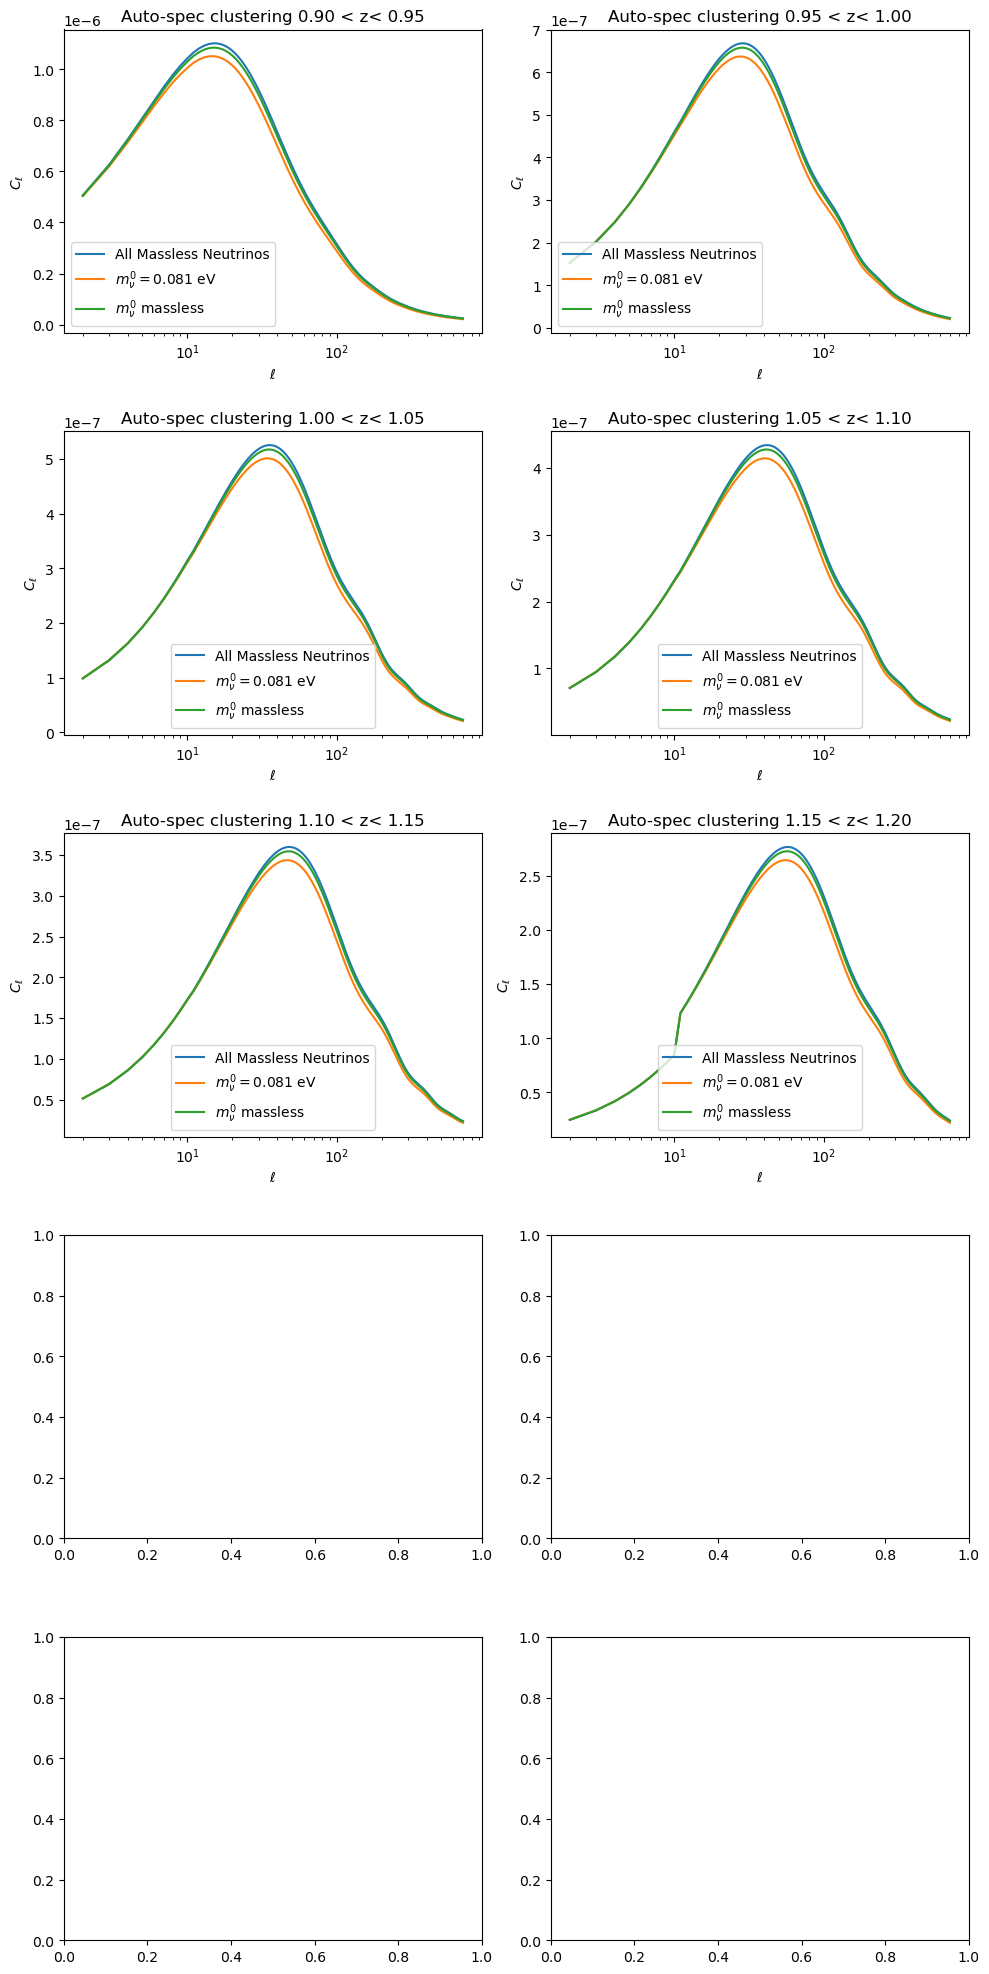

In [ ]:
fig, axs = plt.subplots(5, 2, figsize=(10, 20))  # Create a 5x2 grid of subplots
axs = axs.ravel()  # Flatten the array of axes
plt.title(r"Euclid Photo GC x CMB Lensing (fixed $\Omega_m=0.315$)")

for i, (key, value) in enumerate(photoGC_x_cmbLen_m0massless.items()):  # Assuming cls is a dictionary
    #axs[i].plot(ell, value, label=f'{key}')
    axs[i].plot(ell, photoGC_x_cmbLen_masless[key], label='All Massless Neutrinos')
    axs[i].plot(ell, photoGC_x_cmbLen_nu[key], label=r'$m_{\nu}^0 = 0.081$ eV')
    axs[i].plot(ell, photoGC_x_cmbLen_m0massless[key], label=r'$m_{\nu}^0$ massless')
    axs[i].set_xscale('log')
    axs[i].set_title(f"Auto-spec clustering {zbins_spec[i][0]:.2f} < z< {zbins_spec[i][1]:.2f}")
    axs[i].set_xlabel(r'$\ell$')
    axs[i].set_ylabel(r'$C_\ell$')
    axs[i].legend(loc=0)

plt.tight_layout()  # Adjust the layout so that the plots do not overlap
plt.show()

<>:2: SyntaxWarning: invalid escape sequence '\O'
<>:16: SyntaxWarning: invalid escape sequence '\e'
<>:2: SyntaxWarning: invalid escape sequence '\O'
<>:16: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_10542/2720391743.py:2: SyntaxWarning: invalid escape sequence '\O'
  plt.title("Euclid Photo GC x CMB Lensing (fixed $\Omega_m=0.315$)")
/tmp/ipykernel_10542/2720391743.py:16: SyntaxWarning: invalid escape sequence '\e'
  plt.xlabel('$\ell$', fontsize=14)
/tmp/ipykernel_10542/2720391743.py:40: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 550)


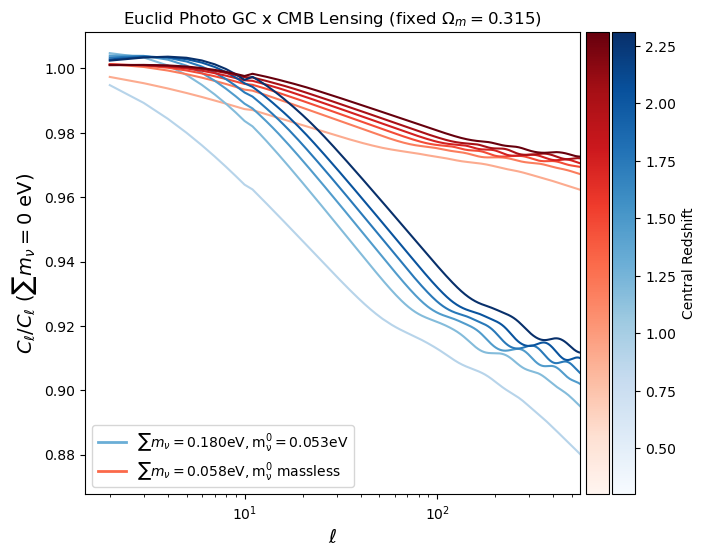

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.title(r"Euclid Photo GC x CMB Lensing (fixed $\Omega_m=0.315$)")
colors = cm.Blues(np.linspace(0.3, 1, len(cls_auto_massless)))
colors_r = cm.Reds(np.linspace(0.3, 1, len(cls_auto_massless)))


for color, (key, value) in zip(colors, photoGC_x_cmbLen_masless.items()):
    if key==9:
        pass
    else:
        plt.plot(ell, photoGC_x_cmbLen_nu[key]/photoGC_x_cmbLen_masless[key], color=colors[key], )#label=f'{key} sum = 0.26 eV')
        plt.plot(ell, photoGC_x_cmbLen_m0massless[key]/photoGC_x_cmbLen_masless[key], color=colors_r[key], )#label=f'{key} but first is massless')

plt.xscale('log')
#plt.legend(loc=0)
plt.xlabel(r'$\ell$', fontsize=14)
plt.ylabel(r'$C_\ell/C_{\ell}$ $(\sum m_{\nu}=0$ eV)', fontsize=14)

# Create a ScalarMappable object for each colormap
sm = mpl.cm.ScalarMappable(cmap=cm.Blues, norm=plt.Normalize(vmin=average_z.min(), vmax=average_z.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', label='Central Redshift', pad=-0.1)

sm_r = mpl.cm.ScalarMappable(cmap=cm.Reds, norm=plt.Normalize(vmin=average_z.min(), vmax=average_z.max()))
sm_r.set_array([])
cbar_r = plt.colorbar(sm_r, ax=ax, orientation='vertical', pad=0.01)

# Remove ticks and labels from the Reds colorbar
cbar_r.ax.yaxis.set_ticks([])
#cbar_r.ax.yaxis.set_label_position('none')
# Create custom legend
custom_lines = [Line2D([0], [0], color=cm.Blues(0.5), lw=2),
                Line2D([0], [0], color=cm.Reds(0.5), lw=2)]
plt.legend(custom_lines, [r'$\sum m_{\nu}=0.180 \rm{eV}, m_{\nu}^0=0.053 \rm{eV}$', 
                          r'$\sum m_{\nu}=0.058 \rm{eV}, m_{\nu}^0$ massless'])

# Move the labels and ticks to the right in the Blues colorbar
cbar.ax.yaxis.tick_right()
cbar.ax.yaxis.set_label_position('right')
plt.xlim(0, 550)
plt.show()

## Euclid WL x CMB Lensing

In [70]:
wl_x_cmbLen_masless = {i: ccl.angular_cl(cosmo, cmb_lensing_tracer, lens[i], ell_lensing, l_limber=10) 
                             for i in range(0, len(tomo_nz))}

wl_x_cmbLen_nu = {i: ccl.angular_cl(cosmo_neutrino, cmb_lensing_tracer2, lens[i], ell_lensing, l_limber=10) 
                               for i in range(0, len(tomo_nz))}

wl_x_cmbLen_m0massless = {i: ccl.angular_cl(cosmo_neutrino_m0_massless, cmb_lensing_tracer3, lens[i], ell_lensing, l_limber=10) 
                               for i in range(0, len(tomo_nz))}

<>:11: SyntaxWarning: invalid escape sequence '\e'
<>:12: SyntaxWarning: invalid escape sequence '\e'
<>:11: SyntaxWarning: invalid escape sequence '\e'
<>:12: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_10542/3111797786.py:11: SyntaxWarning: invalid escape sequence '\e'
  axs[i].set_xlabel('$\ell$')
/tmp/ipykernel_10542/3111797786.py:12: SyntaxWarning: invalid escape sequence '\e'
  axs[i].set_ylabel('$C_\ell$')


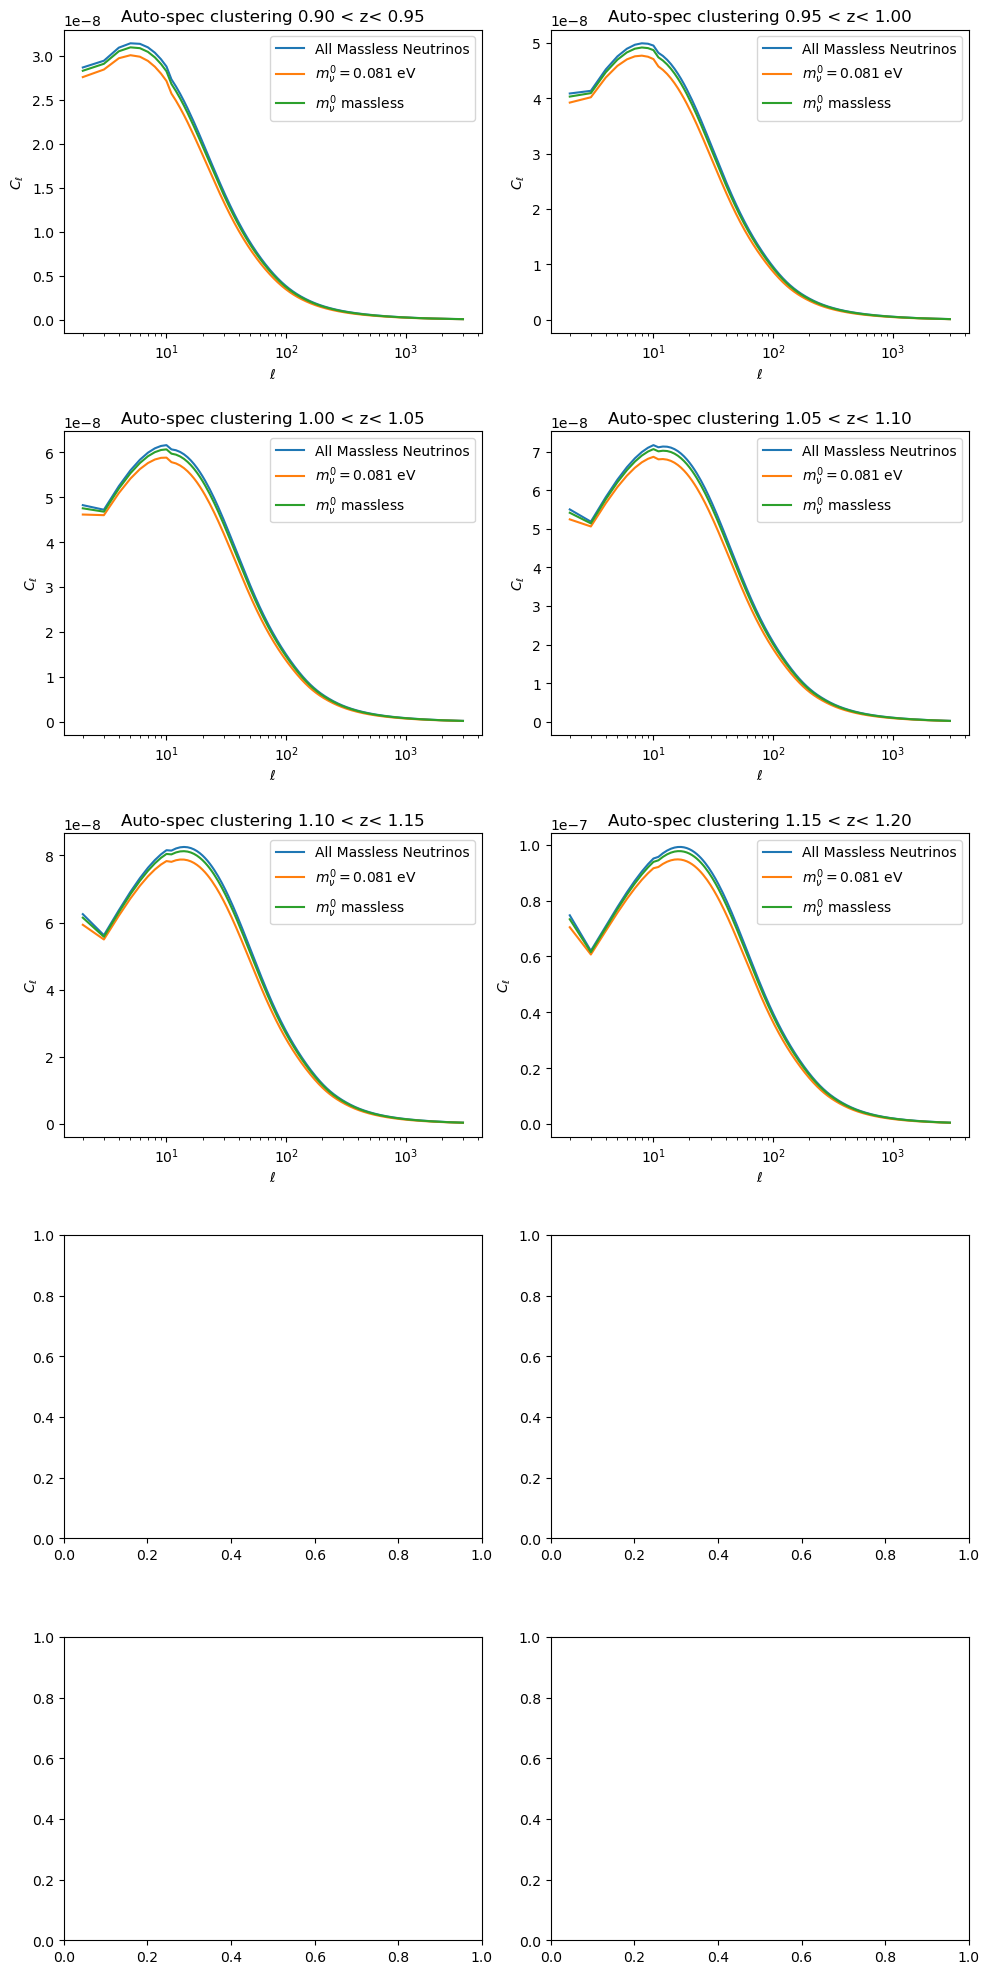

In [71]:
fig, axs = plt.subplots(5, 2, figsize=(10, 20))  # Create a 5x2 grid of subplots
axs = axs.ravel()  # Flatten the array of axes

for i, (key, value) in enumerate(wl_x_cmbLen_m0massless.items()):  # Assuming cls is a dictionary
    #axs[i].plot(ell, value, label=f'{key}')
    axs[i].plot(ell_lensing, wl_x_cmbLen_masless[key], label='All Massless Neutrinos')
    axs[i].plot(ell_lensing, wl_x_cmbLen_nu[key], label=r'$m_{\nu}^0 = 0.081$ eV')
    axs[i].plot(ell_lensing, wl_x_cmbLen_m0massless[key], label=r'$m_{\nu}^0$ massless')
    axs[i].set_xscale('log')
    axs[i].set_title(f"Auto-spec clustering {zbins_spec[i][0]:.2f} < z< {zbins_spec[i][1]:.2f}")
    axs[i].set_xlabel('$\ell$')
    axs[i].set_ylabel('$C_\ell$')
    axs[i].legend(loc=0)

plt.tight_layout()  # Adjust the layout so that the plots do not overlap
plt.show()

<>:2: SyntaxWarning: invalid escape sequence '\O'
<>:16: SyntaxWarning: invalid escape sequence '\e'
<>:2: SyntaxWarning: invalid escape sequence '\O'
<>:16: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_10542/2980632579.py:2: SyntaxWarning: invalid escape sequence '\O'
  plt.title("Euclid Weak Lensing x CMB Lensing (fixed $\Omega_m=0.315$)")
/tmp/ipykernel_10542/2980632579.py:16: SyntaxWarning: invalid escape sequence '\e'
  plt.xlabel('$\ell$', fontsize=14)


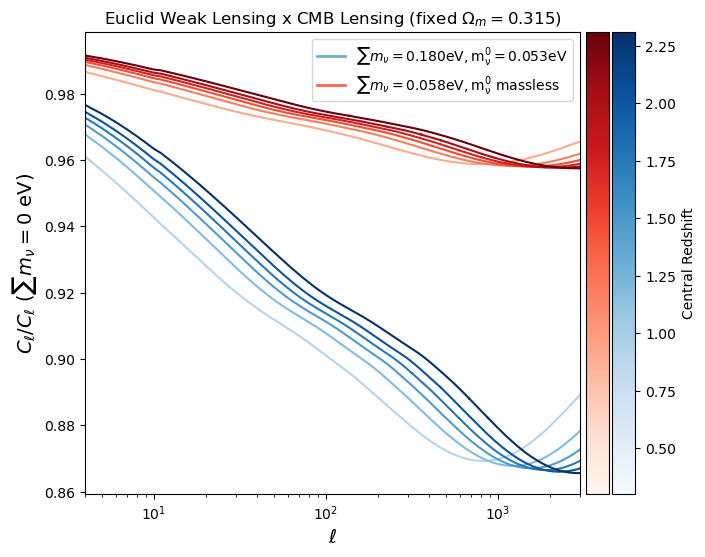

In [72]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.title("Euclid Weak Lensing x CMB Lensing (fixed $\Omega_m=0.315$)")
colors = cm.Blues(np.linspace(0.3, 1, len(cls_auto_massless)))
colors_r = cm.Reds(np.linspace(0.3, 1, len(cls_auto_massless)))


for color, (key, value) in zip(colors, wl_x_cmbLen_nu.items()):
    if key==9:
        pass
    else:
        plt.plot(ell_lensing, wl_x_cmbLen_nu[key]/wl_x_cmbLen_masless[key], color=colors[key], )#label=f'{key} sum = 0.26 eV')
        plt.plot(ell_lensing, wl_x_cmbLen_m0massless[key]/wl_x_cmbLen_masless[key], color=colors_r[key], )#label=f'{key} but first is massless')

plt.xscale('log')
#plt.legend(loc=0)
plt.xlabel('$\ell$', fontsize=14)
plt.ylabel(r'$C_\ell/C_{\ell}$ $(\sum m_{\nu}=0$ eV)', fontsize=14)

# Create a ScalarMappable object for each colormap
sm = mpl.cm.ScalarMappable(cmap=cm.Blues, norm=plt.Normalize(vmin=average_z.min(), vmax=average_z.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', label='Central Redshift', pad=-0.1)

sm_r = mpl.cm.ScalarMappable(cmap=cm.Reds, norm=plt.Normalize(vmin=average_z.min(), vmax=average_z.max()))
sm_r.set_array([])
cbar_r = plt.colorbar(sm_r, ax=ax, orientation='vertical', pad=0.01)

# Remove ticks and labels from the Reds colorbar
cbar_r.ax.yaxis.set_ticks([])
#cbar_r.ax.yaxis.set_label_position('none')
# Create custom legend
custom_lines = [Line2D([0], [0], color=cm.Blues(0.5), lw=2),
                Line2D([0], [0], color=cm.Reds(0.5), lw=2)]
plt.legend(custom_lines, [r'$\sum m_{\nu}=0.180 \rm{eV}, m_{\nu}^0=0.053 \rm{eV}$', 
                          r'$\sum m_{\nu}=0.058 \rm{eV}, m_{\nu}^0$ massless'])

# Move the labels and ticks to the right in the Blues colorbar
cbar.ax.yaxis.tick_right()
cbar.ax.yaxis.set_label_position('right')
plt.xlim(4, 3000)
plt.show()

# tSZ Effect

In [73]:
tSZ_massless = ccl.tracers.tSZTracer(cosmo)
tSZ_nu = ccl.tracers.tSZTracer(cosmo_neutrino)
tSZ_m00 = ccl.tracers.tSZTracer(cosmo_neutrino_m0_massless)

## tSZ x Spec Clustering

In [74]:
specGC_x_tSZ_masless = {i: ccl.angular_cl(cosmo, tSZ_massless, clust_rsd_spec[i], ell, l_limber=1) 
                             for i in range(0, len(tomo_nz))}

specGC_x_tSZ_nu = {i: ccl.angular_cl(cosmo_neutrino, tSZ_nu, clust_rsd_spec[i], ell, l_limber=1) 
                               for i in range(0, len(tomo_nz))}

specGC_x_tSZ_m0massless = {i: ccl.angular_cl(cosmo_neutrino_m0_massless, tSZ_m00, clust_rsd_spec[i], ell, l_limber=1) 
                               for i in range(0, len(tomo_nz))}

<>:4: SyntaxWarning: invalid escape sequence '\O'
<>:15: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\O'
<>:15: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_10542/2472392489.py:4: SyntaxWarning: invalid escape sequence '\O'
  plt.title("Euclid Spec Clustering x tSZ (fixed $\Omega_m=0.315$)")
/tmp/ipykernel_10542/2472392489.py:15: SyntaxWarning: invalid escape sequence '\e'
  plt.xlabel('$\ell$', fontsize=14)


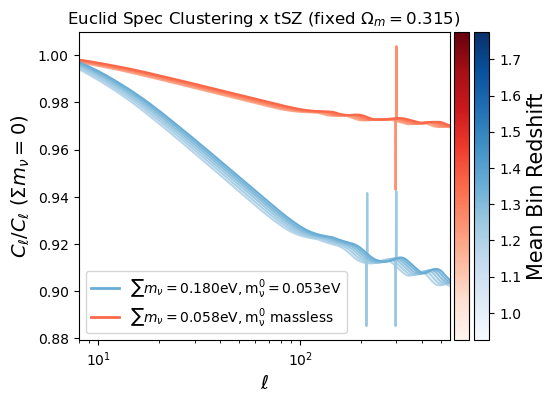

In [75]:
average_z_spec = np.array([np.mean(bin) for bin in zbins_spec])

fig, ax = plt.subplots(figsize=(6, 4))
plt.title("Euclid Spec Clustering x tSZ (fixed $\Omega_m=0.315$)")
colors = cm.Blues(np.linspace(0.3, 1, len(cls_auto_massless_spec)))
colors_r = cm.Reds(np.linspace(0.3, 1, len(cls_auto_massless_spec)))


for color, (key, value) in zip(colors, specGC_x_tSZ_masless.items()):
        plt.plot(ell, specGC_x_tSZ_nu[key]/specGC_x_tSZ_masless[key], color=colors[key], )#label=f'{key} sum = 0.26 eV')
        plt.plot(ell, specGC_x_tSZ_m0massless[key]/specGC_x_tSZ_masless[key], color=colors_r[key], )#label=f'{key} but first is massless')

plt.xscale('log')
#plt.legend(loc=0)
plt.xlabel('$\ell$', fontsize=14)
plt.ylabel(r'$C_{\ell}/C_{\ell}$ $(\Sigma m_{\nu}=0$)', fontsize=14)

# Create a ScalarMappable object for each colormap
sm = mpl.cm.ScalarMappable(cmap=cm.Blues, norm=plt.Normalize(vmin=average_z_spec.min(), vmax=average_z_spec.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical',  pad=-0.1)
cbar.set_label('Mean Bin Redshift', size=15) 

sm_r = mpl.cm.ScalarMappable(cmap=cm.Reds, norm=plt.Normalize(vmin=average_z_spec.min(), vmax=average_z_spec.max()))
sm_r.set_array([])
cbar_r = plt.colorbar(sm_r, ax=ax, orientation='vertical', pad=0.01)

# Remove ticks and labels from the Reds colorbar
cbar_r.ax.yaxis.set_ticks([])
#cbar_r.ax.yaxis.set_label_position('none')
# Create custom legend
custom_lines = [Line2D([0], [0], color=cm.Blues(0.5), lw=2),
                Line2D([0], [0], color=cm.Reds(0.5), lw=2)]
plt.legend(custom_lines, [r'$\sum m_{\nu}=0.180 \rm{eV}, m_{\nu}^0=0.053 \rm{eV}$', 
                          r'$\sum m_{\nu}=0.058 \rm{eV}, m_{\nu}^0$ massless'])

# Move the labels and ticks to the right in the Blues colorbar
cbar.ax.yaxis.tick_right()
cbar.ax.yaxis.set_label_position('right')
#plt.ylim(0.80, 1.2)
plt.xlim(8, 550)
plt.show()

## tSZ x Photo GC

In [76]:
photoGC_x_tSZ_masless = {i: ccl.angular_cl(cosmo, tSZ_massless, clust_rsd[i], ell, l_limber=1) 
                             for i in range(0, len(tomo_nz))}

photoGC_x_tSZ_nu = {i: ccl.angular_cl(cosmo_neutrino, tSZ_nu, clust_rsd[i], ell, l_limber=1) 
                               for i in range(0, len(tomo_nz))}

photoGC_x_tSZ_m0massless = {i: ccl.angular_cl(cosmo_neutrino_m0_massless, tSZ_m00, clust_rsd[i], ell, l_limber=1) 
                               for i in range(0, len(tomo_nz))}

<>:2: SyntaxWarning: invalid escape sequence '\O'
<>:16: SyntaxWarning: invalid escape sequence '\e'
<>:2: SyntaxWarning: invalid escape sequence '\O'
<>:16: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_10542/273084465.py:2: SyntaxWarning: invalid escape sequence '\O'
  plt.title("Euclid Photo GC x tSZ (fixed $\Omega_m=0.315$)")
/tmp/ipykernel_10542/273084465.py:16: SyntaxWarning: invalid escape sequence '\e'
  plt.xlabel('$\ell$', fontsize=14)
/tmp/ipykernel_10542/273084465.py:40: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 550)


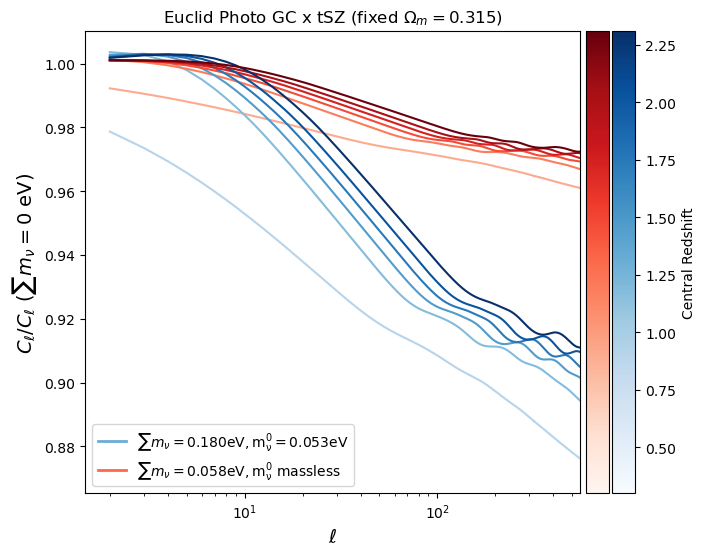

In [77]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.title("Euclid Photo GC x tSZ (fixed $\Omega_m=0.315$)")
colors = cm.Blues(np.linspace(0.3, 1, len(cls_auto_massless)))
colors_r = cm.Reds(np.linspace(0.3, 1, len(cls_auto_massless)))


for color, (key, value) in zip(colors, photoGC_x_cmbLen_masless.items()):
    if key==9:
        pass
    else:
        plt.plot(ell, photoGC_x_tSZ_nu[key]/photoGC_x_tSZ_masless[key], color=colors[key], )#label=f'{key} sum = 0.26 eV')
        plt.plot(ell, photoGC_x_tSZ_m0massless[key]/photoGC_x_tSZ_masless[key], color=colors_r[key], )#label=f'{key} but first is massless')

plt.xscale('log')
#plt.legend(loc=0)
plt.xlabel('$\ell$', fontsize=14)
plt.ylabel(r'$C_\ell/C_{\ell}$ $(\sum m_{\nu}=0$ eV)', fontsize=14)

# Create a ScalarMappable object for each colormap
sm = mpl.cm.ScalarMappable(cmap=cm.Blues, norm=plt.Normalize(vmin=average_z.min(), vmax=average_z.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', label='Central Redshift', pad=-0.1)

sm_r = mpl.cm.ScalarMappable(cmap=cm.Reds, norm=plt.Normalize(vmin=average_z.min(), vmax=average_z.max()))
sm_r.set_array([])
cbar_r = plt.colorbar(sm_r, ax=ax, orientation='vertical', pad=0.01)

# Remove ticks and labels from the Reds colorbar
cbar_r.ax.yaxis.set_ticks([])
#cbar_r.ax.yaxis.set_label_position('none')
# Create custom legend
custom_lines = [Line2D([0], [0], color=cm.Blues(0.5), lw=2),
                Line2D([0], [0], color=cm.Reds(0.5), lw=2)]
plt.legend(custom_lines, [r'$\sum m_{\nu}=0.180 \rm{eV}, m_{\nu}^0=0.053 \rm{eV}$', 
                          r'$\sum m_{\nu}=0.058 \rm{eV}, m_{\nu}^0$ massless'])

# Move the labels and ticks to the right in the Blues colorbar
cbar.ax.yaxis.tick_right()
cbar.ax.yaxis.set_label_position('right')
plt.xlim(0, 550)
plt.show()

## tSZ x Euclid WL

In [78]:
wl_x_tSZ_masless = {i: ccl.angular_cl(cosmo, tSZ_massless, lens[i], ell_lensing, l_limber=1) 
                             for i in range(0, len(tomo_nz))}

wl_x_tSZ_nu = {i: ccl.angular_cl(cosmo_neutrino, tSZ_nu, lens[i], ell_lensing, l_limber=1) 
                               for i in range(0, len(tomo_nz))}

wl_x_tSZ_m0massless = {i: ccl.angular_cl(cosmo_neutrino_m0_massless, tSZ_m00, lens[i], ell_lensing, l_limber=1) 
                               for i in range(0, len(tomo_nz))}

<>:2: SyntaxWarning: invalid escape sequence '\O'
<>:16: SyntaxWarning: invalid escape sequence '\e'
<>:2: SyntaxWarning: invalid escape sequence '\O'
<>:16: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_10542/1890541246.py:2: SyntaxWarning: invalid escape sequence '\O'
  plt.title("Euclid Weak Lensing x CMB Lensing (fixed $\Omega_m=0.315$)")
/tmp/ipykernel_10542/1890541246.py:16: SyntaxWarning: invalid escape sequence '\e'
  plt.xlabel('$\ell$', fontsize=14)


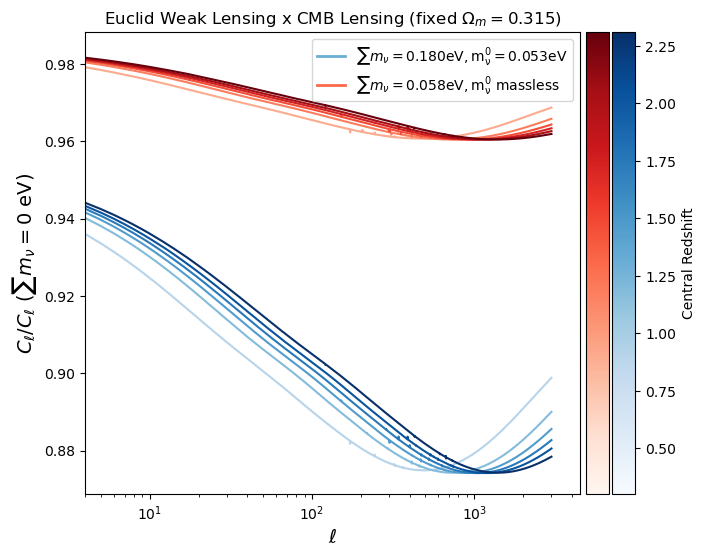

In [79]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.title("Euclid Weak Lensing x CMB Lensing (fixed $\Omega_m=0.315$)")
colors = cm.Blues(np.linspace(0.3, 1, len(cls_auto_massless)))
colors_r = cm.Reds(np.linspace(0.3, 1, len(cls_auto_massless)))


for color, (key, value) in zip(colors, wl_x_tSZ_masless.items()):
    if key==9:
        pass
    else:
        plt.plot(ell_lensing, wl_x_tSZ_nu[key]/wl_x_tSZ_masless[key], color=colors[key], )#label=f'{key} sum = 0.26 eV')
        plt.plot(ell_lensing, wl_x_tSZ_m0massless[key]/wl_x_tSZ_masless[key], color=colors_r[key], )#label=f'{key} but first is massless')

plt.xscale('log')
#plt.legend(loc=0)
plt.xlabel('$\ell$', fontsize=14)
plt.ylabel(r'$C_\ell/C_{\ell}$ $(\sum m_{\nu}=0$ eV)', fontsize=14)

# Create a ScalarMappable object for each colormap
sm = mpl.cm.ScalarMappable(cmap=cm.Blues, norm=plt.Normalize(vmin=average_z.min(), vmax=average_z.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', label='Central Redshift', pad=-0.1)

sm_r = mpl.cm.ScalarMappable(cmap=cm.Reds, norm=plt.Normalize(vmin=average_z.min(), vmax=average_z.max()))
sm_r.set_array([])
cbar_r = plt.colorbar(sm_r, ax=ax, orientation='vertical', pad=0.01)

# Remove ticks and labels from the Reds colorbar
cbar_r.ax.yaxis.set_ticks([])
#cbar_r.ax.yaxis.set_label_position('none')
# Create custom legend
custom_lines = [Line2D([0], [0], color=cm.Blues(0.5), lw=2),
                Line2D([0], [0], color=cm.Reds(0.5), lw=2)]
plt.legend(custom_lines, [r'$\sum m_{\nu}=0.180 \rm{eV}, m_{\nu}^0=0.053 \rm{eV}$', 
                          r'$\sum m_{\nu}=0.058 \rm{eV}, m_{\nu}^0$ massless'])

# Move the labels and ticks to the right in the Blues colorbar
cbar.ax.yaxis.tick_right()
cbar.ax.yaxis.set_label_position('right')
plt.xlim(4, 4500)
plt.show()

# ISW x Euclid

In [80]:
ISW_massless = ccl.tracers.ISWTracer(cosmo)
ISW_nu = ccl.tracers.ISWTracer(cosmo_neutrino)
ISW_m00 = ccl.tracers.ISWTracer(cosmo_neutrino_m0_massless)

## ISW x Spec GC

In [81]:
specGC_x_ISW_masless = {i: ccl.angular_cl(cosmo, ISW_massless, clust_rsd_spec[i], ell, l_limber=1100) 
                             for i in range(0, len(tomo_nz))}

specGC_x_ISW_nu = {i: ccl.angular_cl(cosmo_neutrino, ISW_nu, clust_rsd_spec[i], ell, l_limber=1100) 
                               for i in range(0, len(tomo_nz))}

specGC_x_ISW_m0massless = {i: ccl.angular_cl(cosmo_neutrino_m0_massless, ISW_m00, clust_rsd_spec[i], ell, l_limber=1100) 
                               for i in range(0, len(tomo_nz))}

<>:4: SyntaxWarning: invalid escape sequence '\O'
<>:15: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\O'
<>:15: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_10542/3830097433.py:4: SyntaxWarning: invalid escape sequence '\O'
  plt.title("Euclid Spec Clustering x ISW (fixed $\Omega_m=0.315$)")
/tmp/ipykernel_10542/3830097433.py:15: SyntaxWarning: invalid escape sequence '\e'
  plt.xlabel('$\ell$', fontsize=14)


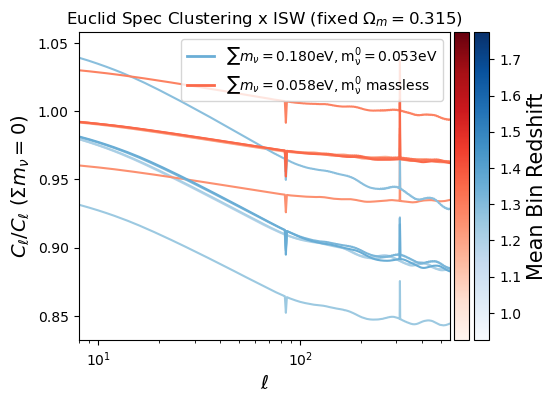

In [82]:
average_z_spec = np.array([np.mean(bin) for bin in zbins_spec])

fig, ax = plt.subplots(figsize=(6, 4))
plt.title("Euclid Spec Clustering x ISW (fixed $\Omega_m=0.315$)")
colors = cm.Blues(np.linspace(0.3, 1, len(cls_auto_massless_spec)))
colors_r = cm.Reds(np.linspace(0.3, 1, len(cls_auto_massless_spec)))


for color, (key, value) in zip(colors, specGC_x_ISW_masless.items()):
        plt.plot(ell, specGC_x_ISW_nu[key]/specGC_x_ISW_masless[key], color=colors[key], )#label=f'{key} sum = 0.26 eV')
        plt.plot(ell, specGC_x_ISW_m0massless[key]/specGC_x_ISW_masless[key], color=colors_r[key], )#label=f'{key} but first is massless')

plt.xscale('log')
#plt.legend(loc=0)
plt.xlabel('$\ell$', fontsize=14)
plt.ylabel(r'$C_{\ell}/C_{\ell}$ $(\Sigma m_{\nu}=0$)', fontsize=14)

# Create a ScalarMappable object for each colormap
sm = mpl.cm.ScalarMappable(cmap=cm.Blues, norm=plt.Normalize(vmin=average_z_spec.min(), vmax=average_z_spec.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical',  pad=-0.1)
cbar.set_label('Mean Bin Redshift', size=15) 

sm_r = mpl.cm.ScalarMappable(cmap=cm.Reds, norm=plt.Normalize(vmin=average_z_spec.min(), vmax=average_z_spec.max()))
sm_r.set_array([])
cbar_r = plt.colorbar(sm_r, ax=ax, orientation='vertical', pad=0.01)

# Remove ticks and labels from the Reds colorbar
cbar_r.ax.yaxis.set_ticks([])
#cbar_r.ax.yaxis.set_label_position('none')
# Create custom legend
custom_lines = [Line2D([0], [0], color=cm.Blues(0.5), lw=2),
                Line2D([0], [0], color=cm.Reds(0.5), lw=2)]
plt.legend(custom_lines, [r'$\sum m_{\nu}=0.180 \rm{eV}, m_{\nu}^0=0.053 \rm{eV}$', 
                          r'$\sum m_{\nu}=0.058 \rm{eV}, m_{\nu}^0$ massless'])

# Move the labels and ticks to the right in the Blues colorbar
cbar.ax.yaxis.tick_right()
cbar.ax.yaxis.set_label_position('right')
#plt.ylim(0.80, 1.2)
plt.xlim(8, 550)
plt.show()

## ISW x Photo GC

In [83]:
photoGC_x_ISW_masless = {i: ccl.angular_cl(cosmo, ISW_massless, clust_rsd[i], ell, l_limber=1) 
                             for i in range(0, len(tomo_nz))}
photoGC_x_ISW_nu = {i: ccl.angular_cl(cosmo_neutrino, ISW_nu, clust_rsd[i], ell, l_limber=1) 
                               for i in range(0, len(tomo_nz))}
photoGC_x_ISW_m0massless = {i: ccl.angular_cl(cosmo_neutrino_m0_massless, ISW_m00, clust_rsd[i], ell, l_limber=1) 
                               for i in range(0, len(tomo_nz))}

<>:2: SyntaxWarning: invalid escape sequence '\O'
<>:16: SyntaxWarning: invalid escape sequence '\e'
<>:2: SyntaxWarning: invalid escape sequence '\O'
<>:16: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_10542/337652889.py:2: SyntaxWarning: invalid escape sequence '\O'
  plt.title("Euclid Photo GC x ISW (fixed $\Omega_m=0.315$)")
/tmp/ipykernel_10542/337652889.py:16: SyntaxWarning: invalid escape sequence '\e'
  plt.xlabel('$\ell$', fontsize=14)
/tmp/ipykernel_10542/337652889.py:40: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 550)


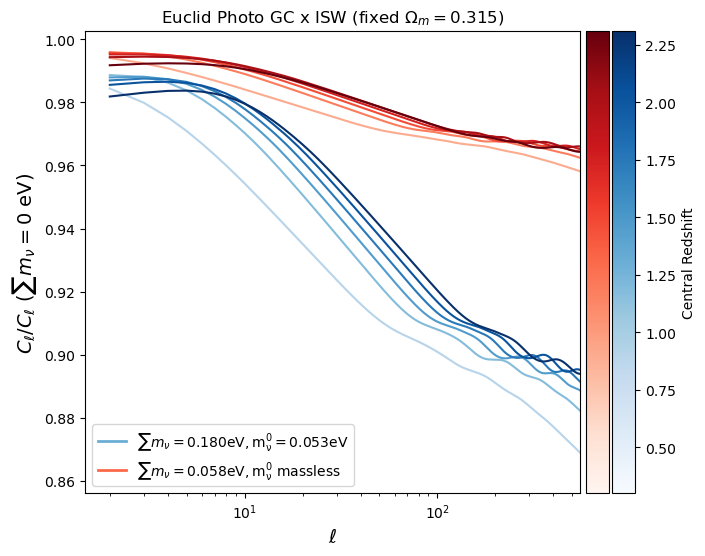

In [84]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.title("Euclid Photo GC x ISW (fixed $\Omega_m=0.315$)")
colors = cm.Blues(np.linspace(0.3, 1, len(cls_auto_massless)))
colors_r = cm.Reds(np.linspace(0.3, 1, len(cls_auto_massless)))


for color, (key, value) in zip(colors, photoGC_x_ISW_masless.items()):
    if key==9:
        pass
    else:
        plt.plot(ell, photoGC_x_ISW_nu[key]/photoGC_x_ISW_masless[key], color=colors[key], )#label=f'{key} sum = 0.26 eV')
        plt.plot(ell, photoGC_x_ISW_m0massless[key]/photoGC_x_ISW_masless[key], color=colors_r[key], )#label=f'{key} but first is massless')

plt.xscale('log')
#plt.legend(loc=0)
plt.xlabel('$\ell$', fontsize=14)
plt.ylabel(r'$C_\ell/C_{\ell}$ $(\sum m_{\nu}=0$ eV)', fontsize=14)

# Create a ScalarMappable object for each colormap
sm = mpl.cm.ScalarMappable(cmap=cm.Blues, norm=plt.Normalize(vmin=average_z.min(), vmax=average_z.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', label='Central Redshift', pad=-0.1)

sm_r = mpl.cm.ScalarMappable(cmap=cm.Reds, norm=plt.Normalize(vmin=average_z.min(), vmax=average_z.max()))
sm_r.set_array([])
cbar_r = plt.colorbar(sm_r, ax=ax, orientation='vertical', pad=0.01)

# Remove ticks and labels from the Reds colorbar
cbar_r.ax.yaxis.set_ticks([])
#cbar_r.ax.yaxis.set_label_position('none')
# Create custom legend
custom_lines = [Line2D([0], [0], color=cm.Blues(0.5), lw=2),
                Line2D([0], [0], color=cm.Reds(0.5), lw=2)]
plt.legend(custom_lines, [r'$\sum m_{\nu}=0.180 \rm{eV}, m_{\nu}^0=0.053 \rm{eV}$', 
                          r'$\sum m_{\nu}=0.058 \rm{eV}, m_{\nu}^0$ massless'])

# Move the labels and ticks to the right in the Blues colorbar
cbar.ax.yaxis.tick_right()
cbar.ax.yaxis.set_label_position('right')
plt.xlim(0, 550)
plt.show()

## WL x ISW

In [85]:
wl_x_ISW_masless = {i: ccl.angular_cl(cosmo, ISW_massless, lens[i], ell_lensing, l_limber=1) 
                             for i in range(0, len(tomo_nz))}

wl_x_ISW_nu = {i: ccl.angular_cl(cosmo_neutrino, ISW_nu, lens[i], ell_lensing, l_limber=1) 
                               for i in range(0, len(tomo_nz))}

wl_x_ISW_m0massless = {i: ccl.angular_cl(cosmo_neutrino_m0_massless, ISW_m00, lens[i], ell_lensing, l_limber=1) 
                               for i in range(0, len(tomo_nz))}

<>:2: SyntaxWarning: invalid escape sequence '\O'
<>:16: SyntaxWarning: invalid escape sequence '\e'
<>:2: SyntaxWarning: invalid escape sequence '\O'
<>:16: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_10542/774360554.py:2: SyntaxWarning: invalid escape sequence '\O'
  plt.title("Euclid Weak Lensing x CMB Lensing (fixed $\Omega_m=0.315$)")
/tmp/ipykernel_10542/774360554.py:16: SyntaxWarning: invalid escape sequence '\e'
  plt.xlabel('$\ell$', fontsize=14)


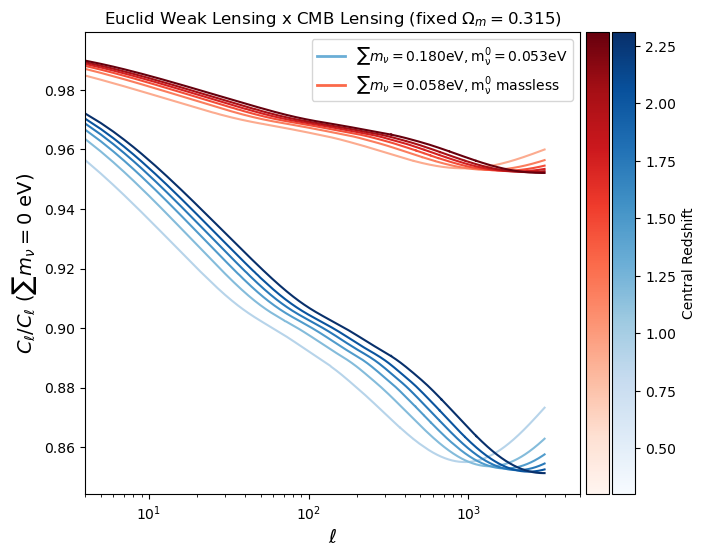

In [86]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.title("Euclid Weak Lensing x CMB Lensing (fixed $\Omega_m=0.315$)")
colors = cm.Blues(np.linspace(0.3, 1, len(cls_auto_massless)))
colors_r = cm.Reds(np.linspace(0.3, 1, len(cls_auto_massless)))


for color, (key, value) in zip(colors, wl_x_ISW_masless.items()):
    if key==9:
        pass
    else:
        plt.plot(ell_lensing, wl_x_ISW_nu[key]/wl_x_ISW_masless[key], color=colors[key], )#label=f'{key} sum = 0.26 eV')
        plt.plot(ell_lensing, wl_x_ISW_m0massless[key]/wl_x_ISW_masless[key], color=colors_r[key], )#label=f'{key} but first is massless')

plt.xscale('log')
#plt.legend(loc=0)
plt.xlabel('$\ell$', fontsize=14)
plt.ylabel(r'$C_\ell/C_{\ell}$ $(\sum m_{\nu}=0$ eV)', fontsize=14)

# Create a ScalarMappable object for each colormap
sm = mpl.cm.ScalarMappable(cmap=cm.Blues, norm=plt.Normalize(vmin=average_z.min(), vmax=average_z.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', label='Central Redshift', pad=-0.1)

sm_r = mpl.cm.ScalarMappable(cmap=cm.Reds, norm=plt.Normalize(vmin=average_z.min(), vmax=average_z.max()))
sm_r.set_array([])
cbar_r = plt.colorbar(sm_r, ax=ax, orientation='vertical', pad=0.01)

# Remove ticks and labels from the Reds colorbar
cbar_r.ax.yaxis.set_ticks([])
#cbar_r.ax.yaxis.set_label_position('none')
# Create custom legend
custom_lines = [Line2D([0], [0], color=cm.Blues(0.5), lw=2),
                Line2D([0], [0], color=cm.Reds(0.5), lw=2)]
plt.legend(custom_lines, [r'$\sum m_{\nu}=0.180 \rm{eV}, m_{\nu}^0=0.053 \rm{eV}$', 
                          r'$\sum m_{\nu}=0.058 \rm{eV}, m_{\nu}^0$ massless'])

# Move the labels and ticks to the right in the Blues colorbar
cbar.ax.yaxis.tick_right()
cbar.ax.yaxis.set_label_position('right')
plt.xlim(4, 5000)
plt.show()

# Checking the matter power spectra

In [87]:
k = np.logspace(-4, 1, 100)

Pk_massless = ccl.linear_matter_power(cosmo, k, 1)
Pk_deg = ccl.linear_matter_power(cosmo_deg, k, 1)
Pk_nu = ccl.linear_matter_power(cosmo_neutrino, k, 1)
Pk_nu_m0_massless = ccl.linear_matter_power(cosmo_neutrino_m0_massless, k, 1)

Text(0, 0.5, '$P(k)/P(k)^{\\text{No Massive Neutrinos}}$')

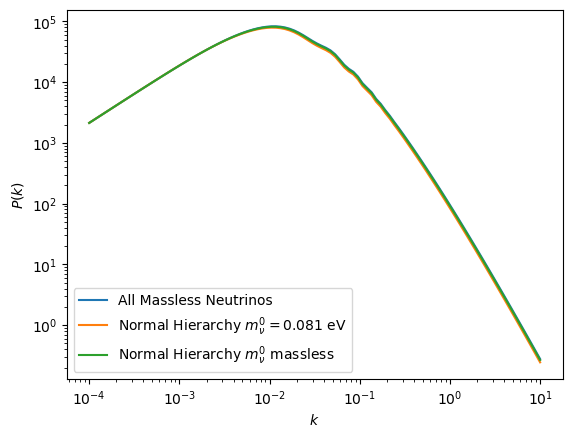

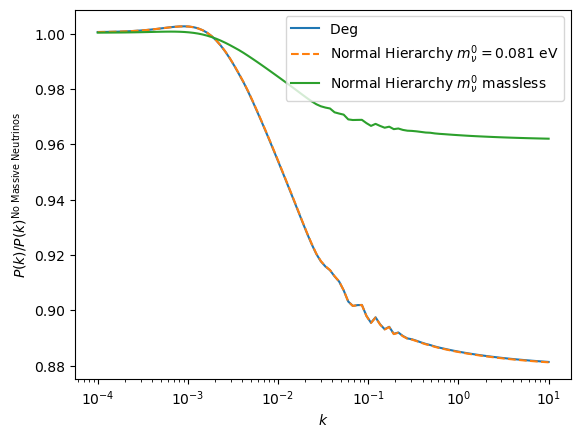

In [88]:
plt.figure()
plt.plot(k, Pk_massless, label='All Massless Neutrinos')
plt.plot(k, Pk_nu, label=r'Normal Hierarchy $m_{\nu}^0 = 0.081$ eV')
plt.plot(k, Pk_nu_m0_massless, label=r'Normal Hierarchy $m_{\nu}^0$ massless')
plt.yscale('log')
plt.xscale('log')
plt.legend(loc=0)
plt.xlabel('$k$')
plt.ylabel('$P(k)$')

plt.figure()
plt.plot(k, Pk_deg/Pk_massless, label=r'Deg ')
plt.plot(k, Pk_nu/Pk_massless, '--', label=r'Normal Hierarchy $m_{\nu}^0 = 0.081$ eV')
#plt.plot(k, Pk_nu, label=r'Normal Hierarchy $m_{\nu}^0 = 0.081$ eV')
plt.plot(k, Pk_nu_m0_massless/Pk_massless, label=r'Normal Hierarchy $m_{\nu}^0$ massless')
#plt.yscale('log')
plt.xscale('log')
plt.legend(loc=0)
plt.xlabel('$k$')
plt.ylabel(r'$P(k)/P(k)^{\text{No Massive Neutrinos}}$')

In [89]:
clust_rsd_spec

{0: <pyccl.tracers.NzTracer>
 	num       kernel             transfer       prefac  bessel 
 	 0  0x81f5c49c425139ba  0x33be2e43b3fda653    0       0    
 	 1  0x81f5c49c425139ba  0x5a0a85bb72537bb8    0       2    ,
 1: <pyccl.tracers.NzTracer>
 	num       kernel             transfer       prefac  bessel 
 	 0  0xa3273e086da9831   0x33be2e43b3fda653    0       0    
 	 1  0xa3273e086da9831   0x5a0a85bb72537bb8    0       2    ,
 2: <pyccl.tracers.NzTracer>
 	num       kernel             transfer       prefac  bessel 
 	 0  0xcef69665e30647fd  0x33be2e43b3fda653    0       0    
 	 1  0xcef69665e30647fd  0x5a0a85bb72537bb8    0       2    ,
 3: <pyccl.tracers.NzTracer>
 	num       kernel             transfer       prefac  bessel 
 	 0  0x8e83bc135269a148  0x33be2e43b3fda653    0       0    
 	 1  0x8e83bc135269a148  0x5a0a85bb72537bb8    0       2    ,
 4: <pyccl.tracers.NzTracer>
 	num       kernel             transfer       prefac  bessel 
 	 0  0xe7a7c95c5f52a391  0x33be2e43b3fda653 

In [90]:
print(ccl.background.omega_x(cosmo, species='neutrinos_massive', a=1),
      ccl.background.omega_x(cosmo, species='matter', a=1))

0.0 0.315


In [91]:
print(ccl.background.omega_x(cosmo_neutrino, species='neutrinos_massive', a=1),
      ccl.background.omega_x(cosmo_neutrino, species='matter', a=1))

0.0043052009447308755 0.31500520094473083


In [92]:
print(ccl.background.omega_x(cosmo_neutrino, species='neutrinos_massive', a=1),
      ccl.background.omega_x(cosmo_neutrino, species='matter', a=1))

0.0043052009447308755 0.31500520094473083


<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:6: SyntaxWarning: invalid escape sequence '\e'
<>:7: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:6: SyntaxWarning: invalid escape sequence '\e'
<>:7: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_10542/279418964.py:3: SyntaxWarning: invalid escape sequence '\e'
  plt.plot(ell, cls_limb, label='Limber $\ell > 60$')
/tmp/ipykernel_10542/279418964.py:6: SyntaxWarning: invalid escape sequence '\e'
  plt.xlabel('$\ell$')
/tmp/ipykernel_10542/279418964.py:7: SyntaxWarning: invalid escape sequence '\e'
  plt.ylabel('$C_\ell$')
/tmp/ipykernel_10542/279418964.py:3: SyntaxWarning: invalid escape sequence '\e'
  plt.plot(ell, cls_limb, label='Limber $\ell > 60$')
/tmp/ipykernel_10542/279418964.py:6: SyntaxWarning: invalid escape sequence '\e'
  plt.xlabel('$\ell$')
/tmp/ipykernel_10542/279418964.py:7: SyntaxWarning: invalid escape sequence '\e'
  plt.ylabel('$C_\ell$')


NameError: name 'cls' is not defined

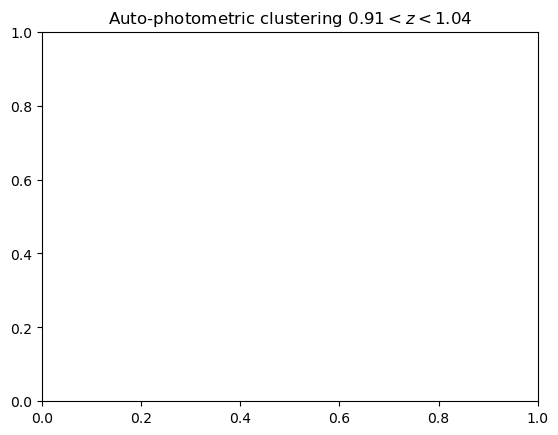

: 

In [ ]:
plt.title("Auto-photometric clustering $0.91 < z< 1.04$")
plt.plot(ell, cls, label='Non-Limber')
plt.plot(ell, cls_limb, label='Limber $\ell > 60$')
plt.xscale('log')
plt.legend(loc=0)
plt.xlabel('$\ell$')
plt.ylabel('$C_\ell$')

In [ ]:
cls_auto_nolimb = ccl.angular_cl(cosmo, clust_rsd_spec[4], clust_rsd_spec[4], ell, l_limber='auto')
cls_auto_limb = ccl.angular_cl(cosmo, clust_rsd_spec[4], clust_rsd_spec[4], ell, l_limber=1)

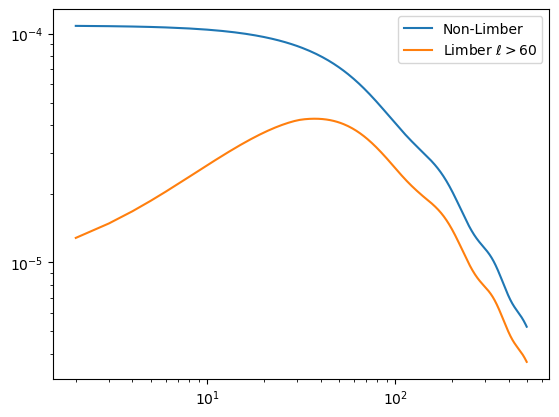

In [ ]:
plt.loglog()
plt.plot(ell, cls_auto_nolimb, label='Non-Limber')
plt.plot(ell, cls_auto_limb, label='Limber $\ell > 60$')
plt.legend(loc=0)

In [ ]:
%%time
cls = cosmo.angular_cl(lens1, lens2, ell, l_limber='auto')

CPU times: user 129 ms, sys: 32.9 ms, total: 162 ms
Wall time: 223 ms


In [ ]:
%%time
cls_noLimb = cosmo.angular_cl(lens1, lens2, ell, l_limber=100)

CPU times: user 99.8 ms, sys: 90.4 ms, total: 190 ms
Wall time: 89.9 ms


In [ ]:
%%time
cls_limb = ccl.angular_cl(cosmo, lens1, lens2, ell, l_limber=1)

CPU times: user 34.4 ms, sys: 731 µs, total: 35.1 ms
Wall time: 4.34 ms


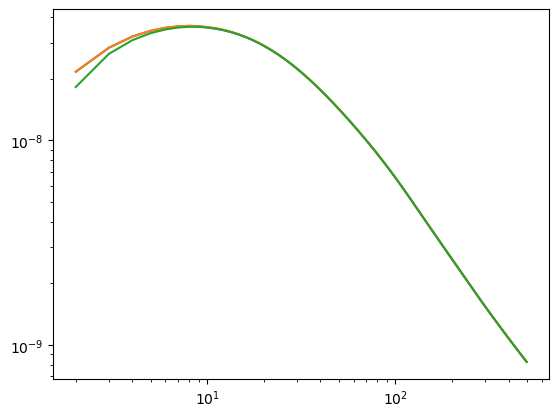

In [ ]:
plt.loglog(ell, cls, label='auto-limber')
plt.loglog(ell, cls_noLimb, label='no limber')
plt.loglog(ell, cls_limb, label='limber')